## Capstone Project-The Battle of Neighborhoods

**Hayford Tetteh** <br>
**Capstone Project** <br>
**IBM Data Science Professional Certificate** <br> 

## A Suitable Neighborhood To Open a Hotel and Restaurant In Cape Town, South Africa

![South-Africa-Landscape.jpg](attachment:South-Africa-Landscape.jpg)

**TABLE OF CONTENT**

   **1 Introduction/Business Problem**
   
     1.a Discussion of the business problem and the audience who would be 
         interested in this project.
   
   **2 Data Section**
       
     2.a Getting Foursquare Geo Coordinate data form major Neighborhoods in Cape Town?
     2.b Getting Foursquare Venue data
     2.c scrape the data from the generated URLs
     2.d  function that extracts the category of the venue
     2.e set up to pull the likes from the API based on venue ID
     2.f This is the raw dataset now so let us rename it something more appropriate
   
 **3 Methodology Section**
   
    3.a Let us draw the map of Cape Town showing some of the Neighborhoods
    3.b All Venues in Cape Town, a total of 444 venues
    3.c How Far are hotels from the core location
    3.d How Far are Restaurants from the core location
    3.e Explore for other venues around Cape Town
    3.f Requested for ratings of venues
    
   
   **4 Results Section**
   4 Analysis And Results
   4.1 Restaurants
   4.2 Linear Regression
   4.3 Logistic Regression
   4.4 Center of all clusters & Midpoint of all venues
    
   **5 Discussion Section**
   
   **6 Conclusion Section** 

## Introduction
South Africa, called by some people the 'Rainbow Nation', a title that captures its diversity and 11 official languages. South Africa is a country where creative expression flourishes and its cultural diversity are embodied in its arts and culture. The country boast of vast tourist and heritage sites including wonderful beaches and cities. Tourism has been one of the high revenue generating industry for the country and so is any company that operate within this industry. Whether you visit the naturally beautiful city of Cape Town and the bottle-green hills of its wine valleys or head out on to any of the beautiful beaches, a holiday in Cape Town will tick all the right boxes.

## 1. Discussion of the business problem.
The Suitable Neighbourhood to Open a Hotel and Restaurant in Cape Town. Coming down to business problem, Narh Bleponi Tourism Company base in Ghana is expanding their operations to South Africa, Cape Town to be precise. The company want to identify the best Neighbourhood in this wonderful city’s highly populated neighbourhood, a suitable location to open a hotel and restaurant as this city is a famous tourist spot. The company is aware there will be many competitors in terms of hotel and restaurant, But keeping them in mind, they need to locate their hotel in place where more people be attracted to, convenient and comfortable for a stay and enjoy a good meal. South Africa and Cape Town for that matter is an ethnic and cultural diverse city, so a blend of foreign and local flavour of restaurant recipes with Italian, American, typical African, Asian and Indian foods must be available to grab their taste. The challenge is to find a suitable location in this city to open a new hotel and restaurant to attract all local and foreign people in the centre of all famous venues.

## Expected Audience
75% locals which comprise of Blacks, Whites Asians and Indians and 25% foreign peoples of all races visit Cape Town at least once in a year. Some people stay for couple of days or more. Also they find some place to hangout for a good meal. Their main focus might be to stay somewhere near to reach venues. Apart from these set of people, students, tourists and working professionals are common audience here. So we may need to fascinate them all.

## 2. A description of the data and how it will be used to solve the problem. 
**Data to be used:**
We will be completely working on Foursquare data from all the neighbourhood in these city to explore and try to locate our new hotel where more venues like church, temples, beach, museums, memorials other venues excluding hotels and restaurants that are present nearby.

**How to solve the problwm using this data:**
The data set has columns such as Name of venues, Categories of venues, Longitude and Latitude of the venues, Neighbourhood, Id, Likes and Distance from a major central points. We will be looking for midpoint area of venues to locate our new hotel. Before that our major focus will be on all venues present in and around the core place of Cape Town. The data frame has a column postalCode with lots of NaN, thus missing values, but each postalCode represent a neighbourhood and there is a column for neighbourhood so it will be dropped. I will use the Categories column to classify my data in this case we will focus on "Hotels and Restaurants" which then will give us names of hotels and restaurants with their latitudes and longitudes. The most important column is the distance column which we will use to perform our exploratory data analysis and it will tell us the distance between all the existing hotels and restaurants to the central location and where it will be suitable to open our venue.

**For example, if the distance between hotel number 1 and hotel number 2 is 800 metres and the distance between hotel number 1 and hotel number 2 to the central location is 700 mertres and 850 metres respectively, then our new hotel and restaurant could be half way between hotel number 1 and hotel number 2 and closer to the central location about 600 metres or closer.**

Even though Cape Town is atracted to all races, there are cuisines that have higher ratings or likes and these is indicated on the Likes column of the data set and therefore we will use the likes column to choose our menu.

#### Importing The necessary Libraries

In [1]:
!pip install beautifulsoup4
!pip install lxml
!pip install geopy
!pip install folium

In [2]:
# Import libraries
import numpy as np # data in a vectorized manner manipulation
import pandas as pd # data analsysis
import requests # HTTP library
from bs4 import BeautifulSoup # scraping library

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # JSON files manipulation

from sklearn.cluster import KMeans # clustering algorithm

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library
import folium as fl
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.distance import GreatCircleDistance


from sklearn import linear_model
from sklearn.metrics import jaccard_similarity_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
import itertools
print('all libraries are imported')

all libraries are imported


#### 2.a Getting Foursquare Geo Coordinate data form major Neighborhoods in Cape Town

In [3]:
connection2 = 'Bellville, South Africa'

geolocator = Nominatim()
location2 = geolocator.geocode(connection2)
latitude2 = location2.latitude
longitude2 = location2.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(connection2, latitude2, longitude2))


connection3 = 'City Bowl, South Africa'

geolocator = Nominatim()
location3 = geolocator.geocode(connection3)
latitude3 = location3.latitude
longitude3 = location3.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(connection3, latitude3, longitude3))


connection4 = 'Atlantic Seaboard, South Africa'

geolocator = Nominatim()
location4 = geolocator.geocode(connection4)
latitude4 = location4.latitude
longitude4 = location4.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(connection4, latitude4, longitude4))


connection5 = 'Goodwood , South Africa'

geolocator = Nominatim()
location5 = geolocator.geocode(connection5)
latitude5 = location5.latitude
longitude5 = location5.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(connection5, latitude5, longitude5))


connection6 = ' Brackenfell, South Africa'

geolocator = Nominatim()
location6 = geolocator.geocode(connection6)
latitude6 = location6.latitude
longitude6 = location6.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(connection6, latitude6, longitude6))


connection7 = 'Simons Town, South Africa'

geolocator = Nominatim()
location7 = geolocator.geocode(connection7)
latitude7 = location7.latitude
longitude7 = location7.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(connection7, latitude7, longitude7))


connection8 = 'Hout Bay, South Africa'

geolocator = Nominatim()
location8 = geolocator.geocode(connection8)
latitude8 = location8.latitude
longitude8 = location8.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(connection8, latitude8, longitude8))


connection9 = 'Green Point, South Africa'

geolocator = Nominatim()
location9 = geolocator.geocode(connection9)
latitude9 = location9.latitude
longitude9 = location9.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(connection9, latitude9, longitude9))


connection10 = 'Constantia, South Africa'

geolocator = Nominatim()
location10 = geolocator.geocode(connection10)
latitude10 = location10.latitude
longitude10 = location10.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(connection10, latitude10, longitude10))


connection11 = 'Blue Downs, South Africa'

geolocator = Nominatim()
location11 = geolocator.geocode(connection11)
latitude11 = location11.latitude
longitude11 = location11.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(connection11, latitude11, longitude11))


connection12 = 'Parow, South Africa'

geolocator = Nominatim()
location12 = geolocator.geocode(connection12)
latitude12 = location12.latitude
longitude12 = location12.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(connection12, latitude12, longitude12))

connection13 = 'Durbanville , South Africa'

geolocator = Nominatim()
location13 = geolocator.geocode(connection13)
latitude13 = location13.latitude
longitude13 = location13.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(connection13, latitude13, longitude13))


connection14 = 'Muizenberg, South Africa'

geolocator = Nominatim()
location14 = geolocator.geocode(connection14)
latitude14 = location14.latitude
longitude14 = location14.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(connection14, latitude14, longitude14))


connection15 = 'Fish Hoek, South Africa'

geolocator = Nominatim()
location15 = geolocator.geocode(connection15)
latitude15 = location15.latitude
longitude15 = location15.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(connection15, latitude15, longitude15))


connection16 = 'Milnerton, South Africa'

geolocator = Nominatim()
location16 = geolocator.geocode(connection16)
latitude16 = location16.latitude
longitude16 = location16.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(connection16, latitude16, longitude16))

connection17 = 'Wynberg, South Africa'

geolocator = Nominatim()
location17 = geolocator.geocode(connection17)
latitude17 = location17.latitude
longitude17 = location17.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(connection17, latitude17, longitude17))


connection18 = 'Blouberg , South Africa'

geolocator = Nominatim()
location18 = geolocator.geocode(connection18)
latitude18 = location18.latitude
longitude18 = location18.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(connection18, latitude18, longitude18))

connection19 = 'Kuils River, South Africa'

geolocator = Nominatim()
location19 = geolocator.geocode(connection19)
latitude19 = location19.latitude
longitude19 = location19.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(connection19, latitude19, longitude19))


C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Bellville, South Africa are -33.8837334, 18.636870177662715.


C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  if sys.path[0] == '':


The geograpical coordinate of City Bowl, South Africa are -33.9237053, 18.4209932.


C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of Atlantic Seaboard, South Africa are -33.9098767, 18.40850280558061.


C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of Goodwood , South Africa are -33.9066667, 18.5491667.


C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of  Brackenfell, South Africa are -33.883056, 18.7.


C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:48: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of Simons Town, South Africa are -34.193181, 18.433266.


C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:57: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of Hout Bay, South Africa are -34.043093, 18.355645.


C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of Green Point, South Africa are -33.9042571, 18.4059682.


C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:75: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of Constantia, South Africa are -34.0283333, 18.4155556.


C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:84: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of Blue Downs, South Africa are -34.0, 18.6975.


C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of Parow, South Africa are -33.9025, 18.5869444.


C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:101: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of Durbanville , South Africa are -33.8402778, 18.6494444.


C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:110: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of Muizenberg, South Africa are -34.097828750000005, 18.48465644218229.


C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:119: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of Fish Hoek, South Africa are -34.1380557, 18.4248295574857.


C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:128: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of Milnerton, South Africa are -33.8794444, 18.4963889.


C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:136: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of Wynberg, South Africa are -34.0036249, 18.4672507.


C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:145: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of Blouberg , South Africa are -33.3125, 22.1858.


C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:153: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of Kuils River, South Africa are -33.8447933, 18.6681076.


#### 2.b Getting Foursquare Venue data 

In [4]:
CLIENT_ID = 'HT20LCBRAAIDOZTF2ENRIEBOJRXOH4AZ4T1H40SF5M4ZMT3M' # your Foursquare ID
CLIENT_SECRET = '5KQMA142VVKRUG3DFMFPLBDH0R455CWCMCCDGTLLAUSCXZSA' # your Foursquare Secret
VERSION = '20200420' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


LIMIT = 500 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

# create URLs
url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude2, 
    longitude2, 
    radius, 
    LIMIT)


# create URLs
url3 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude3, 
    longitude3, 
    radius, 
    LIMIT)

# create URLs
url4 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude4, 
    longitude4, 
    radius, 
    LIMIT)


# create URLs
url5 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude5, 
    longitude5, 
    radius, 
    LIMIT)

# create URLs
url6 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude6, 
    longitude6, 
    radius, 
    LIMIT)


# create URLs
url7 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude7, 
    longitude7, 
    radius, 
    LIMIT)


# create URLs
url8 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude8, 
    longitude8, 
    radius, 
    LIMIT)


# create URLs
url9 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude9, 
    longitude9, 
    radius, 
    LIMIT)


# create URLs
url10 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude10, 
    longitude10, 
    radius, 
    LIMIT)


# create URLs
url11 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude11, 
    longitude11, 
    radius, 
    LIMIT)


# create URLs
url12 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude12, 
    longitude12, 
    radius, 
    LIMIT)

# create URLs
url13 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude13, 
    longitude13, 
    radius, 
    LIMIT)

# create URLs
url14 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude14, 
    longitude14, 
    radius, 
    LIMIT)

# create URLs
url15 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude15, 
    longitude15, 
    radius, 
    LIMIT)

# create URLs
url16 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude16, 
    longitude16, 
    radius, 
    LIMIT)

# create URLs
url17 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude17, 
    longitude17, 
    radius, 
    LIMIT)

 #create URLs
url18 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude18, 
    longitude18, 
    radius, 
    LIMIT)

# create URLs
url19 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude19, 
    longitude19, 
    radius, 
    LIMIT)

print(url2, url3, url4, url5, url6,url7, url8, url9, url10, 
url11, url12,url13, url14, url15, url16, url17, url18, url19)

Your credentails:
CLIENT_ID: HT20LCBRAAIDOZTF2ENRIEBOJRXOH4AZ4T1H40SF5M4ZMT3M
CLIENT_SECRET:5KQMA142VVKRUG3DFMFPLBDH0R455CWCMCCDGTLLAUSCXZSA
https://api.foursquare.com/v2/venues/explore?&client_id=HT20LCBRAAIDOZTF2ENRIEBOJRXOH4AZ4T1H40SF5M4ZMT3M&client_secret=5KQMA142VVKRUG3DFMFPLBDH0R455CWCMCCDGTLLAUSCXZSA&v=20200420&ll=-33.8837334,18.636870177662715&radius=1000&limit=500 https://api.foursquare.com/v2/venues/explore?&client_id=HT20LCBRAAIDOZTF2ENRIEBOJRXOH4AZ4T1H40SF5M4ZMT3M&client_secret=5KQMA142VVKRUG3DFMFPLBDH0R455CWCMCCDGTLLAUSCXZSA&v=20200420&ll=-33.9237053,18.4209932&radius=1000&limit=500 https://api.foursquare.com/v2/venues/explore?&client_id=HT20LCBRAAIDOZTF2ENRIEBOJRXOH4AZ4T1H40SF5M4ZMT3M&client_secret=5KQMA142VVKRUG3DFMFPLBDH0R455CWCMCCDGTLLAUSCXZSA&v=20200420&ll=-33.9098767,18.40850280558061&radius=1000&limit=500 https://api.foursquare.com/v2/venues/explore?&client_id=HT20LCBRAAIDOZTF2ENRIEBOJRXOH4AZ4T1H40SF5M4ZMT3M&client_secret=5KQMA142VVKRUG3DFMFPLBDH0R455CWCMCCDGTLLAUSC

#### 2.c  scrape the data from the generated URLs

In [5]:
results2 = requests.get(url2).json()
results2

results3 = requests.get(url3).json()
results3

results4 = requests.get(url4).json()
results4

results5 = requests.get(url5).json()
results5

results6 = requests.get(url6).json()
results6

results7 = requests.get(url7).json()
results7

results8 = requests.get(url8).json()
results8

results9 = requests.get(url9).json()
results9

results10 = requests.get(url10).json()
results10

results11 = requests.get(url11).json()
results11

results12 = requests.get(url12).json()
results12

results13 = requests.get(url13).json()
results13

results14 = requests.get(url14).json()
results14

results15 = requests.get(url15).json()
results15

results16 = requests.get(url16).json()
results16

results17 = requests.get(url17).json()
results17

#results18 = requests.get(url18).json()
#results18

results19 = requests.get(url19).json()
results19

{'meta': {'code': 200, 'requestId': '5eba9749be61c9001b9691d7'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Durbanville',
  'headerFullLocation': 'Durbanville, Cape Town',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 9,
  'suggestedBounds': {'ne': {'lat': -33.83579329099999,
    'lng': 18.678923580290636},
   'sw': {'lat': -33.85379330900001, 'lng': 18.657291619709362}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c9164ccb641236abe4d8179',
       'name': 'Checkers',
       'location': {'address': 'Verdi Blvrd, Cobble Walk',
        'lat': -33.843976964481364,
        'lng': 18.677121952643528,
        'labeledLatLngs': [{'label': 'display',
          '

#### 2.d  function that extracts the category of the venue

In [6]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### 2nd Neighborhood  

venues2 = results2['response']['groups'][0]['items']
nearby_venues2 = json_normalize(venues2) # flatten JSON

# filter columns
filtered_columns2 = ['venue.name','venue.location.distance', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.id']

nearby_venues2 =nearby_venues2.loc[:, filtered_columns2]

# filter the category for each row
nearby_venues2['venue.categories'] = nearby_venues2.apply(get_category_type, axis=1)

# clean columns
nearby_venues2.columns = [col.split(".")[-1] for col in nearby_venues2.columns]


### 3rd Neighborhood  

venues3 = results3['response']['groups'][0]['items']
nearby_venues3 = json_normalize(venues3) # flatten JSON

# filter columns
filtered_columns3 = ['venue.name','venue.location.distance', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.id']

nearby_venues3 =nearby_venues3.loc[:, filtered_columns3]

# filter the category for each row
nearby_venues3['venue.categories'] = nearby_venues3.apply(get_category_type, axis=1)

# clean columns
nearby_venues3.columns = [col.split(".")[-1] for col in nearby_venues3.columns]


### 4th Neighborhood  

venues4 = results4['response']['groups'][0]['items']
nearby_venues4 = json_normalize(venues4) # flatten JSON

# filter columns
filtered_columns4 = ['venue.name','venue.location.distance', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.id']

nearby_venues4 =nearby_venues4.loc[:, filtered_columns4]

# filter the category for each row
nearby_venues4['venue.categories'] = nearby_venues4.apply(get_category_type, axis=1)

# clean columns
nearby_venues4.columns = [col.split(".")[-1] for col in nearby_venues4.columns]



### 5th Neighborhood  

venues5 = results5['response']['groups'][0]['items']
nearby_venues5 = json_normalize(venues5) # flatten JSON

# filter columns
filtered_columns5 = ['venue.name','venue.location.distance', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.id']

nearby_venues5 =nearby_venues5.loc[:, filtered_columns5]

# filter the category for each row
nearby_venues5['venue.categories'] = nearby_venues5.apply(get_category_type, axis=1)

# clean columns
nearby_venues5.columns = [col.split(".")[-1] for col in nearby_venues5.columns]



### 6th Neighborhood  

venues6 = results6['response']['groups'][0]['items']
nearby_venues6 = json_normalize(venues6) # flatten JSON

# filter columns
filtered_columns6 = ['venue.name','venue.location.distance', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.id']

nearby_venues6 =nearby_venues6.loc[:, filtered_columns6]

# filter the category for each row
nearby_venues6['venue.categories'] = nearby_venues6.apply(get_category_type, axis=1)

# clean columns
nearby_venues6.columns = [col.split(".")[-1] for col in nearby_venues6.columns]


### 7th Neighborhood  

venues7 = results7['response']['groups'][0]['items']
nearby_venues7 = json_normalize(venues7) # flatten JSON

# filter columns
filtered_columns7 = ['venue.name','venue.location.distance', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.id']

nearby_venues7 =nearby_venues7.loc[:, filtered_columns7]

# filter the category for each row
nearby_venues7['venue.categories'] = nearby_venues7.apply(get_category_type, axis=1)

# clean columns
nearby_venues7.columns = [col.split(".")[-1] for col in nearby_venues7.columns]

### 8th Neighborhood  

venues8 = results8['response']['groups'][0]['items']
nearby_venues8 = json_normalize(venues8) # flatten JSON

# filter columns
filtered_columns8 = ['venue.name','venue.location.distance', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.id']

nearby_venues8 =nearby_venues8.loc[:, filtered_columns8]

# filter the category for each row
nearby_venues8['venue.categories'] = nearby_venues8.apply(get_category_type, axis=1)

# clean columns
nearby_venues8.columns = [col.split(".")[-1] for col in nearby_venues8.columns]


### 9th Neighborhood  

venues9 = results9['response']['groups'][0]['items']
nearby_venues9 = json_normalize(venues9) # flatten JSON

# filter columns
filtered_columns9 = ['venue.name','venue.location.distance', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.id']

nearby_venues9 =nearby_venues9.loc[:, filtered_columns9]

# filter the category for each row
nearby_venues9['venue.categories'] = nearby_venues9.apply(get_category_type, axis=1)

# clean columns
nearby_venues9.columns = [col.split(".")[-1] for col in nearby_venues9.columns]


### 10th Neighborhood  

venues10 = results10['response']['groups'][0]['items']
nearby_venues10 = json_normalize(venues10) # flatten JSON

# filter columns
filtered_columns10 = ['venue.name','venue.location.distance', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.id']

nearby_venues10 =nearby_venues10.loc[:, filtered_columns10]

# filter the category for each row
nearby_venues10['venue.categories'] = nearby_venues10.apply(get_category_type, axis=1)

# clean columns
nearby_venues10.columns = [col.split(".")[-1] for col in nearby_venues10.columns]


### 11th Neighborhood  

venues11 = results11['response']['groups'][0]['items']
nearby_venues11 = json_normalize(venues11) # flatten JSON

# filter columns
filtered_columns11 = ['venue.name','venue.location.distance', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.id']

nearby_venues11 =nearby_venues11.loc[:, filtered_columns11]

# filter the category for each row
nearby_venues11['venue.categories'] = nearby_venues11.apply(get_category_type, axis=1)

# clean columns
nearby_venues11.columns = [col.split(".")[-1] for col in nearby_venues11.columns]


### 12th Neighborhood  

venues12 = results12['response']['groups'][0]['items']
nearby_venues12 = json_normalize(venues12) # flatten JSON

# filter columns
filtered_columns12 = ['venue.name','venue.location.distance', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.id']

nearby_venues12 =nearby_venues12.loc[:, filtered_columns12]

# filter the category for each row
nearby_venues12['venue.categories'] = nearby_venues12.apply(get_category_type, axis=1)
# clean columns
nearby_venues12.columns = [col.split(".")[-1] for col in nearby_venues12.columns]

##13th Neighborhood  
venues13 = results13['response']['groups'][0]['items']
nearby_venues13 = json_normalize(venues13) # flatten JSON

# filter columns
filtered_columns13 = ['venue.name','venue.location.distance', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.id']

nearby_venues13 =nearby_venues13.loc[:, filtered_columns13]

# filter the category for each row
nearby_venues13['venue.categories'] = nearby_venues13.apply(get_category_type, axis=1)

# clean columns
nearby_venues13.columns = [col.split(".")[-1] for col in nearby_venues13.columns]

## 14th Neighborhood  
venues14 = results14['response']['groups'][0]['items']
nearby_venues14 = json_normalize(venues14) # flatten JSON

# filter columns
filtered_columns14 = ['venue.name','venue.location.distance', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.id']

nearby_venues14 =nearby_venues14.loc[:, filtered_columns14]

# filter the category for each row
nearby_venues14['venue.categories'] = nearby_venues14.apply(get_category_type, axis=1)

# clean columns
nearby_venues14.columns = [col.split(".")[-1] for col in nearby_venues14.columns]


## 15th Neighborhood  
venues15 = results15['response']['groups'][0]['items']
nearby_venues15 = json_normalize(venues15) # flatten JSON

# filter columns
filtered_columns15 = ['venue.name','venue.location.distance', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.id']

nearby_venues15 =nearby_venues15.loc[:, filtered_columns15]

# filter the category for each row
nearby_venues15['venue.categories'] = nearby_venues15.apply(get_category_type, axis=1)

# clean columns
nearby_venues15.columns = [col.split(".")[-1] for col in nearby_venues15.columns]

## 16yh Neighborhood  

venues16 = results16['response']['groups'][0]['items']
nearby_venues16 = json_normalize(venues16) # flatten JSON

# filter columns
filtered_columns16 = ['venue.name','venue.location.distance', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.id']

nearby_venues16 =nearby_venues16.loc[:, filtered_columns16]

# filter the category for each row
nearby_venues16['venue.categories'] = nearby_venues16.apply(get_category_type, axis=1)

# clean columns
nearby_venues16.columns = [col.split(".")[-1] for col in nearby_venues16.columns]

##  17th Neighborhood  

venues17 = results17['response']['groups'][0]['items']
nearby_venues17 = json_normalize(venues17) # flatten JSON

# filter columns
filtered_columns17 = ['venue.name','venue.location.distance', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.id']

nearby_venues17 =nearby_venues17.loc[:, filtered_columns17]

# filter the category for each row
nearby_venues17['venue.categories'] = nearby_venues17.apply(get_category_type, axis=1)

# clean columns
nearby_venues17.columns = [col.split(".")[-1] for col in nearby_venues17.columns]

##  19th Neighborhood  
venues19 = results19['response']['groups'][0]['items']
nearby_venues19 = json_normalize(venues19) # flatten JSON

# filter columns
filtered_columns19 = ['venue.name','venue.location.distance', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.id']

nearby_venues19 =nearby_venues19.loc[:, filtered_columns19]

# filter the category for each row
nearby_venues19['venue.categories'] = nearby_venues19.apply(get_category_type, axis=1)

# clean columns
nearby_venues19.columns = [col.split(".")[-1] for col in nearby_venues19.columns]

#print('{} venues were returned by Foursquare.'.format(nearby_venues1.shape[0]))
print('{} venues were returned by Foursquare.'.format(nearby_venues2.shape[0]))
print('{} venues were returned by Foursquare.'.format(nearby_venues3.shape[0]))
print('{} venues were returned by Foursquare.'.format(nearby_venues4.shape[0]))
print('{} venues were returned by Foursquare.'.format(nearby_venues5.shape[0]))
print('{} venues were returned by Foursquare.'.format(nearby_venues6.shape[0]))
print('{} venues were returned by Foursquare.'.format(nearby_venues7.shape[0]))
print('{} venues were returned by Foursquare.'.format(nearby_venues8.shape[0]))
print('{} venues were returned by Foursquare.'.format(nearby_venues9.shape[0]))
print('{} venues were returned by Foursquare.'.format(nearby_venues10.shape[0]))
print('{} venues were returned by Foursquare.'.format(nearby_venues11.shape[0]))
print('{} venues were returned by Foursquare.'.format(nearby_venues12.shape[0]))
print('{} venues were returned by Foursquare.'.format(nearby_venues13.shape[0]))
print('{} venues were returned by Foursquare.'.format(nearby_venues14.shape[0]))
print('{} venues were returned by Foursquare.'.format(nearby_venues15.shape[0]))
print('{} venues were returned by Foursquare.'.format(nearby_venues16.shape[0]))
print('{} venues were returned by Foursquare.'.format(nearby_venues17.shape[0]))
#print('{} venues were returned by Foursquare.'.format(nearby_venues18.shape[0]))
print('{} venues were returned by Foursquare.'.format(nearby_venues19.shape[0]))

C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  from ipykernel import kernelapp as app
C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:70: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:89: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\ipykernel_launcher.py:107: FutureWarning: pandas.io.json.json_normalize

22 venues were returned by Foursquare.
100 venues were returned by Foursquare.
81 venues were returned by Foursquare.
13 venues were returned by Foursquare.
1 venues were returned by Foursquare.
21 venues were returned by Foursquare.
39 venues were returned by Foursquare.
70 venues were returned by Foursquare.
4 venues were returned by Foursquare.
3 venues were returned by Foursquare.
15 venues were returned by Foursquare.
11 venues were returned by Foursquare.
4 venues were returned by Foursquare.
14 venues were returned by Foursquare.
15 venues were returned by Foursquare.
18 venues were returned by Foursquare.
9 venues were returned by Foursquare.


#### add locations data to the data sets of each city

In [7]:
#nearby_venues1['Neighborhood'] = 'False Bay'
nearby_venues2['Neighborhood'] = 'Bellville'
nearby_venues3['Neighborhood'] = 'City Bowl'
nearby_venues4['Neighborhood'] = 'Atlantic Seaboard'
nearby_venues5['Neighborhood'] = 'Goodwood'
nearby_venues6['Neighborhood'] = 'Brackenfell'
nearby_venues7['Neighborhood'] = 'Simons Town'
nearby_venues8['Neighborhood'] = 'Hout Bay'
nearby_venues9['Neighborhood'] = 'Green Point'
nearby_venues10['Neighborhood'] ='Constantia'
nearby_venues11['Neighborhood'] = 'Blue Downs'
nearby_venues12['Neighborhood'] = 'Parow'
nearby_venues13['Neighborhood'] = 'Durbanville'
nearby_venues14['Neighborhood'] = 'Muizenberg'
nearby_venues15['Neighborhood'] = 'Fish Hoek'
nearby_venues16['Neighborhood'] = 'Milnerton'
nearby_venues17['Neighborhood'] = 'Wynberg'
#nearby_venues18['Neighborhood'] = 'Blouberg'
nearby_venues19['Neighborhood'] = 'Kuils River'

#### combine the yhe nieghborhood into one data set

In [8]:
### nearby_venues = nearby_venues1.
nearby_venues = nearby_venues2.copy()
nearby_venues = nearby_venues.append(nearby_venues3)
nearby_venues = nearby_venues.append(nearby_venues4)
nearby_venues = nearby_venues.append(nearby_venues5)
nearby_venues = nearby_venues.append(nearby_venues6)
nearby_venues = nearby_venues.append(nearby_venues7)
nearby_venues = nearby_venues.append(nearby_venues8)
nearby_venues = nearby_venues.append(nearby_venues9)
nearby_venues = nearby_venues.append(nearby_venues10)
nearby_venues = nearby_venues.append(nearby_venues11)
nearby_venues = nearby_venues.append(nearby_venues12)
nearby_venues = nearby_venues.append(nearby_venues13)
nearby_venues = nearby_venues.append(nearby_venues14)
nearby_venues = nearby_venues.append(nearby_venues15)
nearby_venues = nearby_venues.append(nearby_venues16)
nearby_venues = nearby_venues.append(nearby_venues17)
#nearby_venues = nearby_venues.append(nearby_venues18)
nearby_venues = nearby_venues.append(nearby_venues19)

#### 2.e set up to pull the likes from the API based on venue ID

In [12]:
url_list = []
like_list = []
json_list = []

for i in list(nearby_venues.id):
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)
nearby_venues['likes'] = like_list

[8, 11, 13, 34, 8, 44, 39, 20, 7, 5, 9, 5, 10, 3, 19, 9, 6, 4, 9, 2, 3, 0, 74, 96, 35, 121, 21, 64, 132, 84, 75, 14, 12, 84, 62, 59, 49, 94, 24, 87, 29, 107, 8, 86, 108, 69, 615, 7, 45, 16, 46, 10, 211, 123, 23, 39, 4, 55, 46, 26, 181, 38, 31, 63, 68, 39, 120, 84, 278, 191, 8, 7, 17, 8, 6, 54, 261, 8, 41, 12, 75, 34, 26, 139, 21, 33, 55, 21, 7, 340, 32, 8, 12, 13, 29, 11, 54, 41, 18, 65, 41, 7, 35, 133, 79, 10, 41, 62, 38, 22, 9, 22, 89, 38, 11, 79, 18, 83, 40, 10, 4, 8, 159, 25, 15, 31, 50, 49, 144, 6, 19, 25, 34, 9, 37, 21, 8, 46, 134, 11, 174, 109, 199, 103, 26, 34, 21, 111, 8, 186, 25, 201, 14, 21, 19, 347, 12, 4, 7, 4, 6, 20, 5, 10, 15, 10, 24, 5, 50, 6, 23, 91, 234, 7, 6, 7, 13, 11, 60, 2, 41, 22, 21, 8, 10, 1, 13, 6, 39, 5, 13, 10, 2, 3, 47, 4, 5, 6, 1, 3, 4, 2, 0, 20, 1, 1, 1, 1, 1, 0, 0, 2, 4, 2, 0, 1, 1, 57, 18, 9, 23, 11, 6, 5, 24, 0, 10, 10, 9, 3, 7, 8, 1, 1, 2, 0, 4, 3, 25, 15, 19, 46, 6, 123, 70, 4, 8, 13, 13, 12, 23, 1, 58, 3, 4, 15, 4, 24, 0, 5, 0, 7, 6, 0, 0, 3, 5, 2, 

In [13]:
nearby_venues.head()

,name,distance,categories,lat,lng,id,Neighborhood,likes
0,Orms Pro Photo Warehouse North,161,Electronics Store,-33.882375,18.636266,4c9757097605199caf20c8a3,Bellville,8
1,Limnos Bakery,178,Bakery,-33.882925,18.635199,4ba85f7bf964a52079d839e3,Bellville,11
2,Vida E Caffè,424,Café,-33.880021,18.635832,53884c6d498e39acdc8e2ea0,Bellville,13
3,M-Kem,531,Pharmacy,-33.888308,18.635206,4ba20672f964a520ffd637e3,Bellville,34
4,Yuz Sushi,420,Sushi Restaurant,-33.880080,18.635716,4dc19693b0fb1c18ee67094d,Bellville,8


#### 2.f This is the raw dataset now so let us rename it something more appropriate

In [14]:
Cape_Town_Ven = nearby_venues
Cape_Town_Ven.head()

,name,distance,categories,lat,lng,id,Neighborhood,likes
0,Orms Pro Photo Warehouse North,161,Electronics Store,-33.882375,18.636266,4c9757097605199caf20c8a3,Bellville,8
1,Limnos Bakery,178,Bakery,-33.882925,18.635199,4ba85f7bf964a52079d839e3,Bellville,11
2,Vida E Caffè,424,Café,-33.880021,18.635832,53884c6d498e39acdc8e2ea0,Bellville,13
3,M-Kem,531,Pharmacy,-33.888308,18.635206,4ba20672f964a520ffd637e3,Bellville,34
4,Yuz Sushi,420,Sushi Restaurant,-33.880080,18.635716,4dc19693b0fb1c18ee67094d,Bellville,8


#### Rename columns

In [15]:
Cape_Town_Ven.shape

(440, 8)

In [16]:
Cape_Town_Ven = Cape_Town_Ven.rename(columns = {'name':'Name','distance':'Distance','categories': 'Categories', 'lat': 'Latitude','lng':'Longitude', 'id':'Id','Neighborhood':'Neighborhood', 'likes': 'Likes' })

In [20]:
Cape_Town_Ven.to_csv('Cape Town Best Venues_Final.csv')

Printing hotel category

In [17]:
Hotels_Cape = Cape_Town_Ven.loc[Cape_Town_Ven['Categories'] == 'Hotel'].reset_index(drop = True)

In [18]:
Hotels_Cape.iloc[:,1:].head()

,Distance,Categories,Latitude,Longitude,Id,Neighborhood,Likes
0,289,Hotel,-33.921119,18.420665,4b83ea28f964a520771631e3,City Bowl,75
1,160,Hotel,-33.924478,18.419523,4d26a54b068e8cfac9efb24c,City Bowl,84
2,404,Hotel,-33.920829,18.418326,4bc8e896762beee11eae3d38,City Bowl,16
3,470,Hotel,-33.919530,18.420200,5997495e31ac6c1f3bc8ba3c,City Bowl,8
4,836,Hotel,-33.928587,18.414108,4f1018fc00392d01a694e577,City Bowl,41


#### Saving our Hotels to csv

In [26]:
Hotels_Cape.to_csv('Cape Town Hotels7.csv')

#### Getting all categories of Restaurants in Cape Town
#### we can group all cuisines together to make a better categorical variable

In [27]:
Restaurants = ['French Restaurant','Steakhouse','Eastern European Restaurant', 'Scandinavian Restaurant', 'Souvlaki Shop', 
'Mediterranean Restaurant', 'Italian Restaurant', 'Pizza Place','Mexican Restaurant', 'Latin American Restaurant', 
'Brazilian Restaurant', 'Taco Place','Beer Bar', 'Cocktail Bar', 'Tiki Bar', 'Wine Bar', 'Hotel Bar', 'Beer Garden',
'Speakeasy', 'Brewery', 'Pub', 'Bar', 'Gastropub','Hookah Bar','Ramen Restaurant', 'Sushi Restaurant', 'VietnameseRestaurant',
'Thai Restaurant', 'Poke Place','Indian Restaurant','Japanese Curry Restaurant', 'Japanese Restaurant','Indonesian Restaurant',
'Udon Restaurant', 'Noodle House','Falafel Restaurant', 'Filipino Restaurant', 'Turkish Restaurant','Yoshoku Restaurant',
               'Coffee Shop', 'Café', 'Sandwich Place', 'Food Truck',
'Juice Bar', 'Frozen Yogurt Shop', 'Deli / Bodega', 'Dessert Shop','Coffee Shop','Deli Delish','Hot Dog Joint', 'Burger Joint', 'Breakfast Spot', 
'Fondue Restaurant','Southern / Soul Food Restaurant', 'Food & Drink Shop','Caffe','Restaurant', 'American Restaurant', 'BBQ Joint','KFC','Nandos','Beefcakes', 
'Theme Restaurant', 'New American Restaurant','Vegetarian / Vegan Restaurant', 'Seafood Restaurant','Yummy zone','Cattle Baron Grill House','Starlight Diner']

def conditions(s):
    if s['Categories'] in Restaurants:
        return 'Restaurant'
   
    
Cape_Town_Ven['Categories_Rest']= Cape_Town_Ven.apply(conditions,axis =1)

In [28]:
Rest_Cape_Town = Cape_Town_Ven[Cape_Town_Ven['Categories_Rest'] == 'Restaurant'].reset_index(drop = True)

In [31]:
Rest_Cape_Town.head()

,Name,Distance,Categories,Latitude,Longitude,Id,Neighborhood,Likes
0,Vida E Caffè,424,Café,-33.880021,18.635832,53884c6d498e39acdc8e2ea0,Bellville,13
1,Yuz Sushi,420,Sushi Restaurant,-33.880080,18.635716,4dc19693b0fb1c18ee67094d,Bellville,8
2,Cattle Baron Grill House,736,Steakhouse,-33.878730,18.631650,4daf12894df0f639f2595242,Bellville,20
3,Yummy zone,823,Sushi Restaurant,-33.876337,18.636945,4f47cbeae4b0683d4ec88271,Bellville,7
4,Copper Club Eatery,996,Burger Joint,-33.876740,18.630133,564dfed8498ee48b0efd5236,Bellville,5


In [32]:
Rest_Cape_Town.shape

(206, 8)

In [33]:
Rest_Cape_Town.to_csv('Cape Town Restaurants7.csv ')

### 3.Methodology section

In this sections we will perform some data analysis and EDA to find insight from data.We will try to understand the current stats of all given data.Probably, clustering or centroid of all venues will help us to locate new hotel.

In [25]:
Cape_Town_Ven = pd.read_csv('Cape Town Best Venues_Final.csv')
Cape_Town_Ven = Cape_Town_Ven.iloc[:,1:]
Cape_Town_Ven.head()

,Name,Distance,Categories,Latitude,Longitude,Id,Neighborhood,Likes
0,Orms Pro Photo Warehouse North,161,Electronics Store,-33.882375,18.636266,4c9757097605199caf20c8a3,Bellville,8
1,Limnos Bakery,178,Bakery,-33.882925,18.635199,4ba85f7bf964a52079d839e3,Bellville,11
2,Vida E Caffè,424,Café,-33.880021,18.635832,53884c6d498e39acdc8e2ea0,Bellville,13
3,M-Kem,531,Pharmacy,-33.888308,18.635206,4ba20672f964a520ffd637e3,Bellville,34
4,Yuz Sushi,420,Sushi Restaurant,-33.880080,18.635716,4dc19693b0fb1c18ee67094d,Bellville,8


### 3.1 Getting Ratings for Venues

In [66]:
#Rating of venues
Cape_Town_Ven1 =[]

for k in range(Cape_Town_Ven.shape[0]):
    venue_Id = Cape_Town_Ven.Id[k]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_Id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    #print(result)
    try:
        #print(df_venues.name[k],result['response']['venue']['rating'])
        rating=result['response']['venue']['rating']
        Cape_Town_Ven1.append(rating)
        
    except:
        #print(df_venues.name[k],'This venue has not been rated yet.')
        rating='No Rating Yet'
        Cape_Town_Ven1.append(rating)

In [67]:
rating_dict = {'Name': Cape_Town_Ven.Name, 'Categories': Cape_Town_Ven.Categories, 'Distance'
               :Cape_Town_Ven.Distance, 'Latitude':Cape_Town_Ven.Latitude, 'Longitude'
               :Cape_Town_Ven.Longitude, 'Id':Cape_Town_Ven.Id, 'Neighborhood': 
               Cape_Town_Ven.Neighborhood, 'Likes': Cape_Town_Ven.Likes, 'Rating': Cape_Town_Ven1}
Cape_Town_Ven1 =pd.DataFrame(rating_dict)


In [69]:
#Saving it to_csv
Cape_Town_Ven1.to_csv('Rated Venues77Final.csv')

In [26]:
Cape_Town_Ven1 = pd.read_csv('Rated Venues77Final.csv')

In [27]:
Cape_Town_Ven1.iloc[:,1:].head()

,Name,Categories,Distance,Latitude,Longitude,Id,Neighborhood,Likes,Rating
0,Orms Pro Photo Warehouse North,Electronics Store,161,-33.882375,18.636266,4c9757097605199caf20c8a3,Bellville,8,8.1
1,Limnos Bakery,Bakery,178,-33.882925,18.635199,4ba85f7bf964a52079d839e3,Bellville,11,7.8
2,Vida E Caffè,Café,424,-33.880021,18.635832,53884c6d498e39acdc8e2ea0,Bellville,13,8.2
3,M-Kem,Pharmacy,531,-33.888308,18.635206,4ba20672f964a520ffd637e3,Bellville,34,8.3
4,Yuz Sushi,Sushi Restaurant,420,-33.880080,18.635716,4dc19693b0fb1c18ee67094d,Bellville,8,7.6


### 3.2 Getting Tips from Venues

In [11]:
#Rating of venues
Cape_Town_df=[]

for k in range(Cape_Town_Ven1.shape[0]):
    venue_Id = Cape_Town_Ven1.Id[k]
    url = 'https://api.foursquare.com/v2/venues/{}tips?client_id={}&client_secret={}&v={}'.format(venue_Id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    #print(result)
    try:
        #print(df_venues.name[k],result['response']['venue']['rating'])
        tips =result['response']['venue']['tips']['count']
        Cape_Town_df.append(tips)
        
    except:
        #print(df_venues.name[k],'This venue has not been rated yet.')
        tips ='No Tips Yet'
        Cape_Town_df.append(tips)

In [12]:
Tips_dict = {'Name': Cape_Town_Ven1.Name, 'Categories': Cape_Town_Ven1.Categories, 'Distance'
               :Cape_Town_Ven1.Distance, 'Latitude':Cape_Town_Ven1.Latitude, 'Longitude'
               :Cape_Town_Ven1.Longitude, 'Id':Cape_Town_Ven1.Id, 'Neighborhood': 
               Cape_Town_Ven1.Neighborhood, 'Likes': Cape_Town_Ven1.Likes, 'Rating': Cape_Town_Ven1.Rating, 'Tips':Cape_Town_df}
Cape_Town_df =pd.DataFrame(Tips_dict)

In [73]:
Cape_Town_df.to_csv('Final Venues VenuesHT.csv')

In [13]:
Cape_Town_df.head()

,Name,Categories,Distance,Latitude,Longitude,Id,Neighborhood,Likes,Rating,Tips
0,Orms Pro Photo Warehouse North,Electronics Store,161,-33.882375,18.636266,4c9757097605199caf20c8a3,Bellville,8,8.1,No Tips Yet
1,Limnos Bakery,Bakery,178,-33.882925,18.635199,4ba85f7bf964a52079d839e3,Bellville,11,7.8,No Tips Yet
2,Vida E Caffè,Café,424,-33.880021,18.635832,53884c6d498e39acdc8e2ea0,Bellville,13,8.2,No Tips Yet
3,M-Kem,Pharmacy,531,-33.888308,18.635206,4ba20672f964a520ffd637e3,Bellville,34,8.3,No Tips Yet
4,Yuz Sushi,Sushi Restaurant,420,-33.880080,18.635716,4dc19693b0fb1c18ee67094d,Bellville,8,7.6,No Tips Yet


### 3.3 Let us  analyse the venues, compare and plot some variables,draw the map of Cape Town showing some of the Neighborhoods

In [14]:
dataframe_filtered = Cape_Town_df  
print("There are {} Total Venues present in Cape Town".format(dataframe_filtered.shape[0]))

There are 462 Total Venues present in Cape Town


In [15]:
Cape_Town_Ven3 =  Cape_Town_df .groupby('Neighborhood').count()
#Cape_Town_Ven3 = Cape_Town_Ven3.drop(Cape_Town_Ven3.columns[[7]], axis=1)
Cape_Town_Ven3

,Name,Categories,Distance,Latitude,Longitude,Id,Likes,Rating,Tips
Neighborhood,,,,,,,,,
Atlantic Seaboard,85,85,85,85,85,85,85,85,85
Bellville,23,23,23,23,23,23,23,23,23
Blue Downs,3,3,3,3,3,3,3,3,3
Brackenfell,3,3,3,3,3,3,3,3,3
City Bowl,100,100,100,100,100,100,100,100,100
Constantia,4,4,4,4,4,4,4,4,4
Durbanville,11,11,11,11,11,11,11,11,11
Fish Hoek,18,18,18,18,18,18,18,18,18
Goodwood,13,13,13,13,13,13,13,13,13


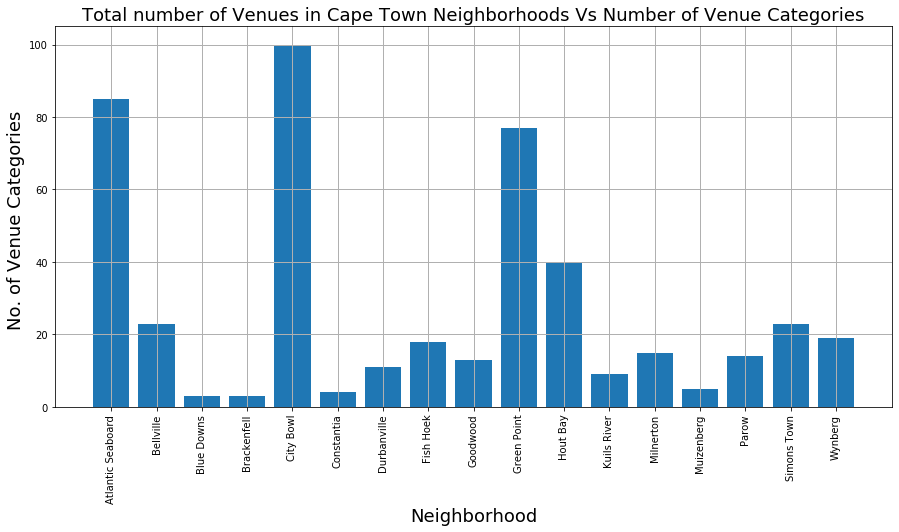

Average Number of categories of venues in  the Neighborhoods of Cape Town is 27 different categories 


In [16]:
def plot_bar_x():
    fig,ax = plt.subplots(1, 1, figsize=(15, 7))
    ax.grid(zorder=3, linewidth = 1)
    index = np.arange(len(Cape_Town_Ven3.index))
    plt.bar(Cape_Town_Ven3.index, Cape_Town_Ven3.Categories)
    plt.xlabel('Neighborhood', fontsize=18)
    plt.ylabel('No. of Venue Categories ', fontsize=18)
    plt.xticks(Cape_Town_Ven3.index,rotation=90)
    plt.title('Total number of Venues in Cape Town Neighborhoods Vs Number of Venue Categories',fontsize=18)
    plt.show()
plot_bar_x()
print("Average Number of categories of venues in  the Neighborhoods of Cape Town is {} different categories ".format(int(sum(Cape_Town_Ven3['Categories'])/Cape_Town_Ven3.shape[0])))

From above we can see that 

In [77]:
Cape_Town_Ven_sum =  Cape_Town_df.groupby('Neighborhood').mean()

In [78]:
Cape_Town_Ven_sum

,Distance,Latitude,Longitude,Likes
Neighborhood,,,,
Atlantic Seaboard,621.870588,-33.909255,18.412025,39.152941
Bellville,570.565217,-33.881441,18.634083,11.913043
Blue Downs,677.333333,-34.000322,18.699748,1.000000
Brackenfell,536.000000,-33.882095,18.702401,0.666667
City Bowl,584.560000,-33.923863,18.418664,61.700000
Constantia,594.500000,-34.029105,18.421201,80.500000
Durbanville,816.909091,-33.833547,18.647278,7.454545
Fish Hoek,654.277778,-34.137721,18.430462,9.000000
Goodwood,709.846154,-33.911647,18.547348,2.769231


In [79]:
Cape_Town_Ven_sum1 = Cape_Town_Ven_sum.drop(Cape_Town_Ven_sum.columns[[0,1,2,3]], axis = 1)

In [80]:
Cape_Town_Ven_sum1= Cape_Town_Ven_sum1.rename(columns = {'Likes':'Average Likes'})

In [32]:
#Cape_Town_Ven_sum1 = Cape_Town_Ven_sum .groupby('Neighborhood').mean()

In [81]:
Cape_Town_Ven4 = Cape_Town_Ven3.drop(Cape_Town_Ven3.columns[[0,1,2,3,4,5]],axis=1)

In [82]:
Cape_Town_Ven4 = Cape_Town_Ven4.rename(columns = {'Id':'Total Venues'})

In [83]:
Cape_Town_Ven_sum4 = pd.concat([Cape_Town_Ven_sum1, Cape_Town_Ven4], axis = 1)
Cape_Town_Ven_sum4

,Likes,Rating,Tips
Neighborhood,,,
Atlantic Seaboard,85,85,85
Bellville,23,23,23
Blue Downs,3,3,3
Brackenfell,3,3,3
City Bowl,100,100,100
Constantia,4,4,4
Durbanville,11,11,11
Fish Hoek,18,18,18
Goodwood,13,13,13


Average distance between All Venues and core location is 605 metres


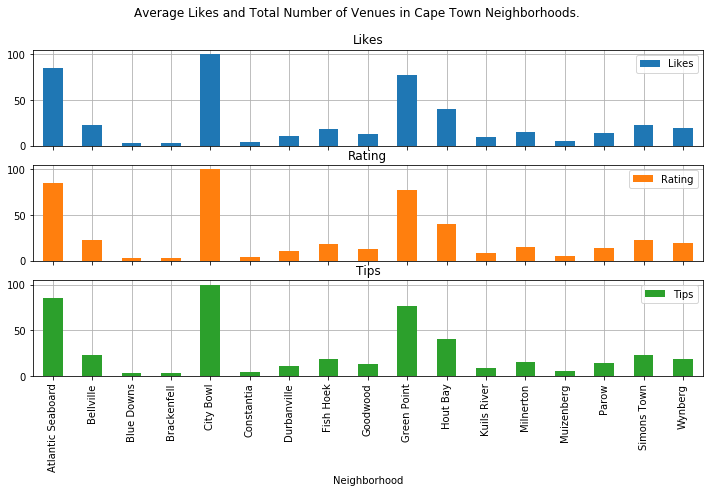

In [84]:
Cape_Town_Ven_sum4.plot(kind='bar',grid=True, zorder = 3, linewidth = 1, title= 'Average Likes and Total Number of Venues in Cape Town Neighborhoods.',
                  subplots = True, sharex = True, figsize=(12, 6)); 
print("Average distance between All Venues and core location is {} metres".format(int(sum(Cape_Town_Ven['Distance'])/Cape_Town_Ven.shape[0])))

#### The Red circle indicates the central location in Cape Town

In [20]:
address = 'Cape Town, South Africa'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Cape Town, ON, South Africa are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Cape Town, ON, South Africa are -33.928992, 18.417396.


#### Locating the central point of Cape Town

In [21]:
Cape_Town_Ven_map = folium.Map(location=[latitude, longitude], zoom_start= 10)
tooltip = 'Click me!'
folium.CircleMarker(
    [latitude, longitude],
    radius= 6,
    color='red',
    popup ='Central Location in Cape Town',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.8,
    tooltip=tooltip).add_to(Cape_Town_Ven_map)
                
Cape_Town_Ven_map

### 3.4 All Venues in Cape Town, a total of 444 venues

In [22]:
Cape_Town_Ven_map = folium.Map(location=[latitude, longitude], zoom_start= 10)
tooltip = 'Click me!'
folium.CircleMarker(
    [latitude, longitude],
    radius= 10,
    color='red',
    popup ='Central Location in Cape Town',
    fill = True,
    fill_color = 'red',
    fill_opacity = 1,
tooltip=tooltip).add_to(Cape_Town_Ven_map)


for lat, lng,Name, Neighborhood in zip(Cape_Town_Ven['Latitude'], Cape_Town_Ven['Longitude'], Cape_Town_Ven['Name'], Cape_Town_Ven['Neighborhood']):
            label = '{}, {}'.format(Name, Neighborhood)
            label = folium.Popup(label, parse_html=True)
            tooltip = 'Click me!'
            folium.CircleMarker(
                [lat, lng],
                radius= 5,
                popup=label,
                color='black',
                fill=True,
                fill_color='orange',
                fill_opacity= 1,
                parse_html = False,
                tooltip=tooltip).add_to(Cape_Town_Ven_map) 
                
Cape_Town_Ven_map

### 3.5 How Far are hotels from the core location

In [88]:
dataframe_filtered = Hotels_Cape 
print("There are {} hotels present in Cape Town".format(dataframe_filtered.shape[0]))

There are 36 hotels present in Cape Town


In [89]:
Hotels_Cape.shape

(36, 8)

In [28]:
Hotels_Cape = pd.read_csv('Cape Town Hotels.csv').reset_index(drop = True)

Hotels_Cape = Hotels_Cape.drop(Hotels_Cape.columns[[0]],axis=1)
Hotels_Cape.head()

,Name,Distance,Categories,Latitude,Longitude,Neighborhood,Likes,Tips
0,Grand Daddy Hotel,289,Hotel,-33.921119,18.420665,City Bowl,75,33
1,Taj Cape Town,160,Hotel,-33.924478,18.419523,City Bowl,84,31
2,Cape Heritage Hotel Cape Town,404,Hotel,-33.920829,18.418326,City Bowl,16,5
3,Stayeasy,470,Hotel,-33.919530,18.420200,City Bowl,8,0
4,African Pride 15 On Orange Hotel,836,Hotel,-33.928587,18.414108,City Bowl,41,8


In [92]:
Hotels_Cape3 = Hotels_Cape.groupby('Neighborhood').count()
Hotels_Cape3

,Name,Distance,Categories,Latitude,Longitude,Likes,Tips
Neighborhood,,,,,,,
Atlantic Seaboard,15,15,15,15,15,15,15
City Bowl,6,6,6,6,6,6,6
Goodwood,1,1,1,1,1,1,1
Green Point,8,8,8,8,8,8,8
Hout Bay,1,1,1,1,1,1,1
Simons Town,1,1,1,1,1,1,1


Find the average distance for all hotels venues in a particual Neighboehood to the Central Location and plot a bar graph to show the distances,Likes and Tips compared to other neighborhoods in Cape Town in single bar graph.

In [93]:
Hotels_Cape1 = Hotels_Cape.groupby('Neighborhood').mean()
Hotels_Cape1 = Hotels_Cape1.drop(Hotels_Cape1.columns[[1,2]],axis=1)
Hotels_Cape1

,Distance,Likes,Tips
Neighborhood,,,
Atlantic Seaboard,636.933333,19.066667,7.60
City Bowl,522.666667,47.666667,16.00
Goodwood,733.000000,1.000000,0.00
Green Point,758.625000,30.125000,11.75
Hout Bay,705.000000,58.000000,34.00
Simons Town,29.000000,1.000000,1.00


In [94]:
Hotels_Cape4 = Hotels_Cape.groupby('Neighborhood').count()
Hotels_Cape4

,Name,Distance,Categories,Latitude,Longitude,Likes,Tips
Neighborhood,,,,,,,
Atlantic Seaboard,15,15,15,15,15,15,15
City Bowl,6,6,6,6,6,6,6
Goodwood,1,1,1,1,1,1,1
Green Point,8,8,8,8,8,8,8
Hout Bay,1,1,1,1,1,1,1
Simons Town,1,1,1,1,1,1,1


Average distance between all hotels and core location is 632 metres


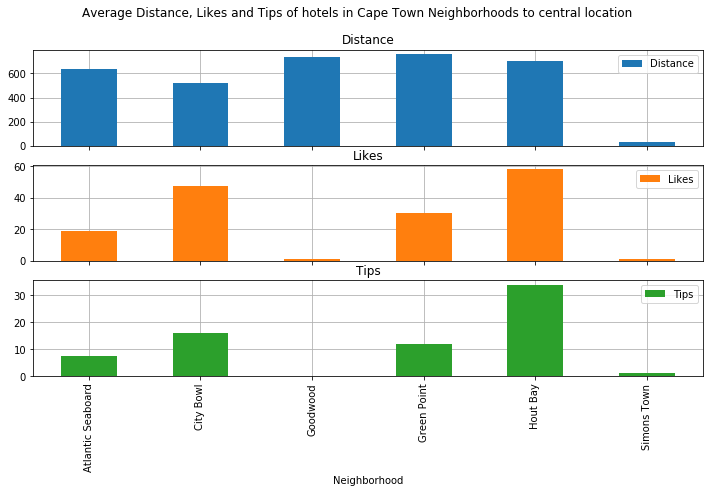

In [95]:
Hotels_Cape1.plot(kind='bar',grid=True, zorder = 3, linewidth = 1, title= 'Average Distance, Likes and Tips of hotels in Cape Town Neighborhoods to central location',
                  subplots = True, sharex = True, figsize=(12,6)); 
print("Average distance between all hotels and core location is {} metres".format(int(sum(Hotels_Cape['Distance'])/Hotels_Cape.shape[0])))

plotting Venues of Hotel only 

In [96]:
address = 'Cape Town, South Africa'

geolocator = Nominatim(user_agent="Jupyter")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of South Africa are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of South Africa are -33.928992, 18.417396.


In [23]:
Hotels_Cape_map = folium.Map(location=[latitude, longitude], zoom_start= 12)
tooltip = 'Click me!'
folium.CircleMarker(
    [latitude, longitude],
    radius= 10,
    color='red',
    popup ='Central Location in Cape Town',
    fill = False,
    fill_color = 'red',
    fill_opacity = 1,
    tooltip=tooltip).add_to(Hotels_Cape_map)


for lat, lng,Name, Neighborhood in zip(Hotels_Cape['Latitude'], Hotels_Cape['Longitude'], Hotels_Cape['Name'], Hotels_Cape['Neighborhood']):
            label = '{}, {}'.format(Name, Neighborhood)
            label = folium.Popup(label, parse_html=True)
            tooltip = 'Click me!'
            folium.Marker(
                [lat, lng],
                radius=2,
                popup=label,
                color='orange',
                fill=True,
                fill_color='maroon',
                fill_opacity=0.7,
                parse_html = False,
                tooltip=tooltip).add_to(Hotels_Cape_map)
            
                
Hotels_Cape_map

### 3.6 How Far are Restaurants from the core location

In [29]:
Rest_Cape_Town = pd.read_csv('Cape Town Restaurants.csv').reset_index(drop = True)

In [30]:
Rest_Cape_Town.iloc[:,1:].head()

,Name,Distance,Categories,Latitude,Longitude,Neighborhood,Likes,Tips
0,Vida E Caffè,424,Café,-33.880021,18.635832,Bellville,13,4
1,Yuz Sushi,420,Sushi Restaurant,-33.880080,18.635716,Bellville,8,9
2,Cattle Baron Grill House,736,Steakhouse,-33.878730,18.631650,Bellville,20,17
3,Yummy zone,823,Sushi Restaurant,-33.876337,18.636945,Bellville,7,3
4,Copper Club Eatery,996,Burger Joint,-33.876740,18.630133,Bellville,5,4


In [234]:
dataframe_filtered = Rest_Cape_Town 
print("There are {} restaurants present in Cape Town".format(dataframe_filtered.shape[0]))

There are 201 restaurants present in Cape Town


In [211]:
Rest_Cape_Town1 = Rest_Cape_Town.drop(Rest_Cape_Town.columns[[0,1,2,3,4,5]],axis=1)
Rest_Cape_Town1.head()

,Neighborhood,Likes,Tips
0,Bellville,13,4
1,Bellville,8,9
2,Bellville,20,17
3,Bellville,7,3
4,Bellville,5,4


In [212]:
Rest_Cape_Town1 = Rest_Cape_Town1.groupby('Neighborhood').mean()
Rest_Cape_Town1 

,Likes,Tips
Neighborhood,,
Atlantic Seaboard,44.900000,23.200000
Bellville,9.222222,6.666667
Blue Downs,0.000000,0.000000
City Bowl,62.745763,23.949153
Constantia,52.500000,18.000000
Durbanville,11.600000,6.600000
Fish Hoek,7.571429,4.428571
Goodwood,0.500000,0.500000
Green Point,37.966667,20.666667


In [213]:
Rest_Cape_Town2 = Rest_Cape_Town.groupby('Neighborhood').count()
Rest_Cape_Town2.iloc[:,1:]

,Name,Distance,Categories,Latitude,Longitude,Likes,Tips
Neighborhood,,,,,,,
Atlantic Seaboard,30,30,30,30,30,30,30
Bellville,9,9,9,9,9,9,9
Blue Downs,1,1,1,1,1,1,1
City Bowl,59,59,59,59,59,59,59
Constantia,2,2,2,2,2,2,2
Durbanville,5,5,5,5,5,5,5
Fish Hoek,7,7,7,7,7,7,7
Goodwood,2,2,2,2,2,2,2
Green Point,30,30,30,30,30,30,30


In [214]:
Rest_Cape_Town3 = Rest_Cape_Town2.drop(Rest_Cape_Town2.columns[[0,1,2,3,4,5,6]], axis = 1)

In [215]:
Rest_Cape_Town3 = Rest_Cape_Town3.rename(columns = {'Tips':'Count'})

In [216]:
Rest_Cape_Town4 = pd.concat([Rest_Cape_Town1, Rest_Cape_Town3], axis = 1)
Rest_Cape_Town4

,Likes,Tips,Count
Neighborhood,,,
Atlantic Seaboard,44.900000,23.200000,30
Bellville,9.222222,6.666667,9
Blue Downs,0.000000,0.000000,1
City Bowl,62.745763,23.949153,59
Constantia,52.500000,18.000000,2
Durbanville,11.600000,6.600000,5
Fish Hoek,7.571429,4.428571,7
Goodwood,0.500000,0.500000,2
Green Point,37.966667,20.666667,30


Average distance between all Restaurants and core location is 571 metres


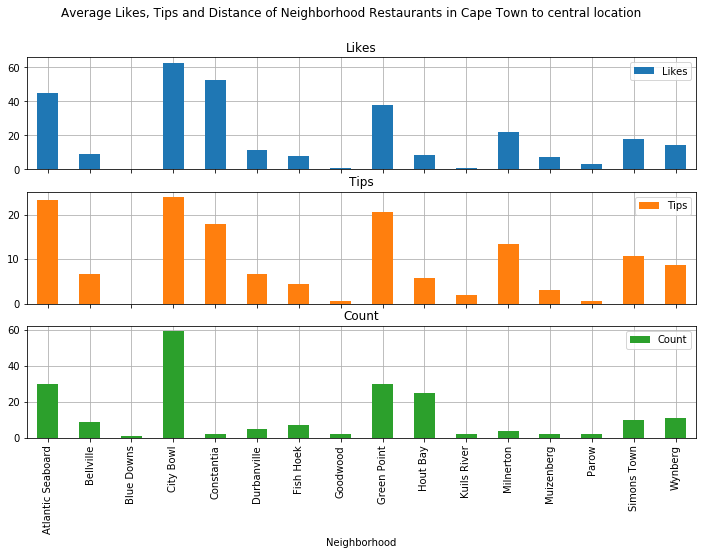

In [293]:
Rest_Cape_Town4.plot(kind='bar',grid=True, zorder = 3, linewidth = 1, title ='Average Likes, Tips and Distance of Neighborhood Restaurants in Cape Town to central location',
                  subplots = True, sharex = True, figsize=(12, 7)); 

print("Average distance between all Restaurants and core location is {} metres".format(int(sum(Rest_Cape_Town ['Distance'])/Rest_Cape_Town .shape[0])))

In [31]:
Rest_Cape_map = folium.Map(location=[latitude, longitude], zoom_start= 12)
tooltip = 'Click me!'
folium.CircleMarker(
    [latitude, longitude],
    radius= 8,
    color='red',
    popup ='Central Location in Cape Town',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.8,
 tooltip=tooltip).add_to(Rest_Cape_map)


for lat, lng,Name, Neighborhood in zip(Rest_Cape_Town['Latitude'], Rest_Cape_Town['Longitude'], Rest_Cape_Town['Name'], Rest_Cape_Town['Neighborhood']):
            label = '{}, {}'.format(Name, Neighborhood)
            label = folium.Popup(label, parse_html=True)
            tooltip = 'Click me!'
            folium.Marker(
                [lat, lng],
                radius=1,
                popup=label,
                color='orange',
                fill=True,
                fill_color='maroon',
                fill_opacity=0.7,
                parse_html = False,
                tooltip=tooltip).add_to(Rest_Cape_map)
                
Rest_Cape_map

### 3. 7 Explore for other venues around Cape Town
A tourist always wants to visit nearby iconic places.So he wants to reside somewhere nearby to all major venues.We will be exploring more venues around the core location.We will be digging more on main areas or place around 1 km.

From Cape_Town_Ven lets us sort and remove hotel & restaurants and get final list of venues.
We could see that there are some hotels/restaurants in the venues list.So we will remove them from the list.We have them in separate dataframe .

In [60]:
to_drop = ['Hotel','Food','Resort','Liquor Store','Deli / Bodega','Fried Chicken Joint','Pub','Irish Pub',
           'Hostel','BBQ Joint','Ice Cream Shop','Bed & Breakfast','Food & Drink Shop','Breakfast Spot','Bakery',
           'Restaurant','Food Court','Burger Joint','Coffee Shop','Café','Steakhouse','Pizza Place','Bar','Diner']
Cape_Town_Ven3 = Cape_Town_Ven[~Cape_Town_Ven ['Categories'].str.contains('|'.join(to_drop))].reset_index()
print("There are {} General venues in Cape Town".format(Cape_Town_Ven3 .shape[0]))
Cape_Town_Ven3 = Cape_Town_Ven3[['Name','Categories','Distance','Latitude','Longitude','Id','Neighborhood','Likes']]

There are 143 General venues in Cape Town


In [61]:
Cape_Town_Ven3.to_csv('General Venues Excluding Restaurants and Hotels77.csv')

In [33]:
Cape_Town_Ven3 = pd.read_csv('General Venues Excluding Restaurants and Hotels.csv').reset_index(drop = True)

In [34]:
Cape_Town_Ven3 = Cape_Town_Ven3.drop(Cape_Town_Ven3.columns[[0]],axis=1)
Cape_Town_Ven3.head()

,Name,Categories,Distance,Latitude,Longitude,Id,Neighborhood,Likes,Tips
0,Orms Pro Photo Warehouse North,Electronics Store,161,-33.882375,18.636266,4c9757097605199caf20c8a3,Bellville,8,2
1,M-Kem,Pharmacy,531,-33.888308,18.635206,4ba20672f964a520ffd637e3,Bellville,34,5
2,Virgin Active Health Club,Gym,800,-33.877190,18.633279,4c41a7cb3735be9a23b218a4,Bellville,44,7
3,Woolworths,Department Store,937,-33.875432,18.635185,4c7e63d1b53db1f7b1ce9f11,Bellville,39,5
4,Spar,Grocery Store,817,-33.876389,18.636899,4d74b8b19a296ea826f958a9,Bellville,5,1


In [139]:
Cape_Town_Ven4 = Cape_Town_Ven3.drop(Cape_Town_Ven3.columns[[1,3,4,5]],axis=1)

In [140]:
Cape_Town_Ven4.head()

,Name,Distance,Neighborhood,Likes,Tips
0,Orms Pro Photo Warehouse North,161,Bellville,8,2
1,M-Kem,531,Bellville,34,5
2,Virgin Active Health Club,800,Bellville,44,7
3,Woolworths,937,Bellville,39,5
4,Spar,817,Bellville,5,1


In [141]:
Cape_Town_Ven5 = Cape_Town_Ven4.groupby('Neighborhood').mean()
Cape_Town_Ven5

,Distance,Likes,Tips
Neighborhood,,,
Atlantic Seaboard,675.250000,57.150000,13.750000
Bellville,687.000000,17.250000,3.125000
Blue Downs,685.000000,1.000000,0.000000
City Bowl,631.040000,61.960000,15.320000
Constantia,799.000000,108.500000,24.000000
Durbanville,865.000000,7.000000,2.500000
Fish Hoek,691.000000,20.000000,3.600000
Goodwood,848.000000,1.800000,0.400000
Green Point,638.478261,31.782609,9.260870


Average distance between General venues and core location is 655 metres


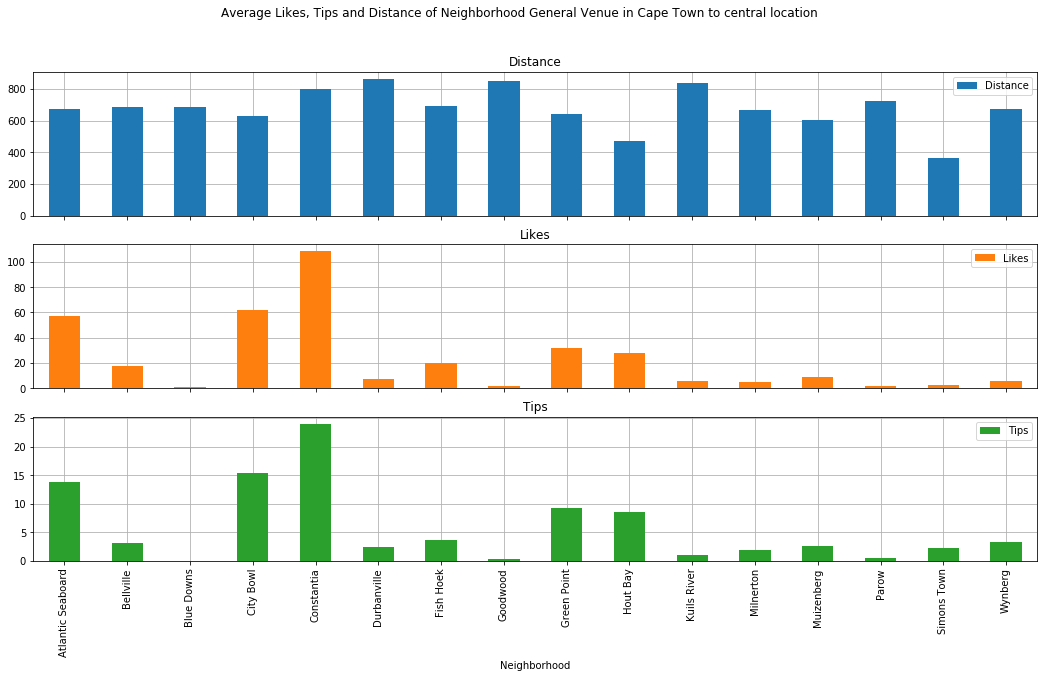

In [142]:
Cape_Town_Ven5.plot(kind='bar',grid=True, zorder = 3, linewidth = 1, title ='Average Likes, Tips and Distance of Neighborhood General Venue in Cape Town to central location',
                  subplots = True, sharex = True, figsize=(18, 9)); 

print("Average distance between General venues and core location is {} metres".format(int(sum(Cape_Town_Ven3['Distance'])/Cape_Town_Ven3.shape[0])))

In [35]:
Cape_Town_Ven3_map = folium.Map(location=[latitude, longitude], zoom_start= 12)
tooltip = 'Click me!'
folium.CircleMarker(
    [latitude, longitude],
    radius= 8,
    color='red',
    popup ='Central Location in Cape Town',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.8,
    tooltip=tooltip).add_to(Cape_Town_Ven3_map)

for lat, lng,Name, Neighborhood in zip(Cape_Town_Ven3['Latitude'], Cape_Town_Ven3['Longitude'], Cape_Town_Ven3['Name'], Cape_Town_Ven3['Neighborhood']):
            label = '{}, {}'.format(Name, Neighborhood)
            label = folium.Popup(label, parse_html=True)
            tooltip = 'Click me!'
            folium.Marker(
                [lat, lng],
                radius=1,
                popup=label,
                color='orange',
                fill=True,
                fill_color='maroon',
                fill_opacity=0.7,
                parse_html = False,
                tooltip=tooltip).add_to(Cape_Town_Ven3_map)

# display map
Cape_Town_Ven3_map


As we could see from above, the General Venues are spread over the 17 Nieghborhoods which is very good for our analysis

### 3.8 Analysing Likes,  ratings and Tips to see which one to use to selecting the General Venues

In [69]:
#Rating of venues
rating_df=[]

for k in range(Cape_Town_Ven3.shape[0]):
    venue_Id = Cape_Town_Ven3.Id[k]
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_Id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    #print(result)
    try:
        #print(df_venues.name[k],result['response']['venue']['rating'])
        rating=result['response']['venue']['rating']
        rating_df.append(rating)
        
    except:
        #print(df_venues.name[k],'This venue has not been rated yet.')
        rating='No Rating Yet'
        rating_df.append(rating)

In [70]:
rating_dict = {'Name': Cape_Town_Ven3.Name, 'Categories': Cape_Town_Ven3.Categories, 'Distance'
               :Cape_Town_Ven3.Distance, 'Latitude':Cape_Town_Ven3.Latitude, 'Longitude'
               :Cape_Town_Ven3.Longitude, 'Id':Cape_Town_Ven3.Id, 'Neighborhood': 
               Cape_Town_Ven3.Neighborhood, 'Likes': Cape_Town_Ven3.Likes, 'Tips'
               :Cape_Town_Ven3.Tips, 'Rating': rating_df}
rating_df =pd.DataFrame(rating_dict)
rating_df.to_csv('Rated Venues.csv')

In [71]:
rating_df.head()

,Name,Categories,Distance,Latitude,Longitude,Id,Neighborhood,Likes,Tips,Rating
0,Orms Pro Photo Warehouse North,Electronics Store,161,-33.882375,18.636266,4c9757097605199caf20c8a3,Bellville,8,2,8.1
1,M-Kem,Pharmacy,531,-33.888308,18.635206,4ba20672f964a520ffd637e3,Bellville,34,5,8.3
2,Virgin Active Health Club,Gym,800,-33.877190,18.633279,4c41a7cb3735be9a23b218a4,Bellville,44,7,8.2
3,Woolworths,Department Store,937,-33.875432,18.635185,4c7e63d1b53db1f7b1ce9f11,Bellville,39,5,8.1
4,Spar,Grocery Store,817,-33.876389,18.636899,4d74b8b19a296ea826f958a9,Bellville,5,1,6.8


In [72]:
rating_df.shape

(140, 10)

In [73]:
rating_df.to_csv('Rated General Venues.csv')

In [38]:
Cape_Town_Venn = pd.read_csv('Rated General Venues.csv')

Let us select venues that have either Rating or Tips, where Tips is not equal to zero(0) 

In [39]:
#Lets take values of only rated venues
Rated_Tips = Cape_Town_Venn[(Cape_Town_Venn['Rating']!='No Rating Yet') |
                            (Cape_Town_Venn['Tips'] != 0)]

Rated_Tips.reset_index(inplace = True,drop = True) 
Rated_Tips.iloc[:,1:].head()

,Name,Categories,Distance,Latitude,Longitude,Id,Neighborhood,Likes,Tips,Rating
0,Orms Pro Photo Warehouse North,Electronics Store,161,-33.882375,18.636266,4c9757097605199caf20c8a3,Bellville,8,2,8.1
1,M-Kem,Pharmacy,531,-33.888308,18.635206,4ba20672f964a520ffd637e3,Bellville,34,5,8.3
2,Virgin Active Health Club,Gym,800,-33.877190,18.633279,4c41a7cb3735be9a23b218a4,Bellville,44,7,8.2
3,Woolworths,Department Store,937,-33.875432,18.635185,4c7e63d1b53db1f7b1ce9f11,Bellville,39,5,8.1
4,Spar,Grocery Store,817,-33.876389,18.636899,4d74b8b19a296ea826f958a9,Bellville,5,1,6.8


In [150]:
Rated_Tips.shape

(111, 11)

I want to drop the Id Cloumn because we will not use it again

In [40]:
Rated_Tips = Rated_Tips.drop(Rated_Tips.columns[[0,6]],axis=1)

Rated_Tips.head()

,Name,Categories,Distance,Latitude,Longitude,Neighborhood,Likes,Tips,Rating
0,Orms Pro Photo Warehouse North,Electronics Store,161,-33.882375,18.636266,Bellville,8,2,8.1
1,M-Kem,Pharmacy,531,-33.888308,18.635206,Bellville,34,5,8.3
2,Virgin Active Health Club,Gym,800,-33.877190,18.633279,Bellville,44,7,8.2
3,Woolworths,Department Store,937,-33.875432,18.635185,Bellville,39,5,8.1
4,Spar,Grocery Store,817,-33.876389,18.636899,Bellville,5,1,6.8


### 3.9 Clusteringthe Neighborhoods 
Let's check how many venues were returned for each neighborhood

In [41]:
Rated_Tips.groupby('Neighborhood').count()

,Name,Categories,Distance,Latitude,Longitude,Likes,Tips,Rating
Neighborhood,,,,,,,,
Atlantic Seaboard,17,17,17,17,17,17,17,17
Bellville,8,8,8,8,8,8,8,8
City Bowl,25,25,25,25,25,25,25,25
Constantia,2,2,2,2,2,2,2,2
Durbanville,2,2,2,2,2,2,2,2
Fish Hoek,4,4,4,4,4,4,4,4
Goodwood,1,1,1,1,1,1,1,1
Green Point,20,20,20,20,20,20,20,20
Hout Bay,8,8,8,8,8,8,8,8


Let's find out how many unique categories can be curated from all the returned venues

In [153]:
print('There are {} uniques categories.'.format(len(Rated_Tips['Categories'].unique())))

There are 54 uniques categories.


 #### Analyze Each Neighborhood

In [42]:
# one hot encoding
Rated_Tips_Hot = pd.get_dummies(Rated_Tips[['Categories']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Rated_Tips_Hot['Neighborhood'] = Rated_Tips['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Rated_Tips_Hot.columns[-1]] + list(Rated_Tips_Hot.columns[:-1])
Rated_Tips_Hot = Rated_Tips_Hot[fixed_columns]

Rated_Tips_Hot.head(10)

,Neighborhood,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Athletics & Sports,Bagel Shop,Beach,Bistro,Bookstore,Bus Station,City Hall,Convenience Store,Cosmetics Shop,Department Store,Dessert Shop,Electronics Store,Fabric Shop,Farmers Market,Flea Market,Furniture / Home Store,Gas Station,Gastropub,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,History Museum,Lake,Lighthouse,Market,Museum,Nightclub,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Photography Lab,Playground,Plaza,Sandwich Place,Scenic Lookout,Shopping Mall,Spa,Sporting Goods Shop,Stadium,Supermarket,Theater,Tour Provider,Toy / Game Store,Vineyard,Wine Shop,Winery
0,Bellville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bellville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Bellville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bellville,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bellville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Bellville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,Bellville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7,Bellville,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,City Bowl,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,City Bowl,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [155]:
Rated_Tips_Hot.shape

(111, 55)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [43]:
Cape_Town_grouped = Rated_Tips_Hot.groupby('Neighborhood').mean().reset_index()
Cape_Town_grouped#.head()

,Neighborhood,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Athletics & Sports,Bagel Shop,Beach,Bistro,Bookstore,Bus Station,City Hall,Convenience Store,Cosmetics Shop,Department Store,Dessert Shop,Electronics Store,Fabric Shop,Farmers Market,Flea Market,Furniture / Home Store,Gas Station,Gastropub,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,History Museum,Lake,Lighthouse,Market,Museum,Nightclub,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Photography Lab,Playground,Plaza,Sandwich Place,Scenic Lookout,Shopping Mall,Spa,Sporting Goods Shop,Stadium,Supermarket,Theater,Tour Provider,Toy / Game Store,Vineyard,Wine Shop,Winery
0,Atlantic Seaboard,0.058824,0.0,0.00,0.058824,0.000000,0.00,0.000,0.000,0.00,0.0,0.00,0.000000,0.058824,0.000,0.00,0.000,0.00,0.00,0.0,0.00,0.000000,0.058824,0.0,0.00,0.058824,0.058824,0.00,0.000,0.00,0.000000,0.058824,0.058824,0.00,0.176471,0.058824,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.058824,0.058824,0.058824,0.000,0.058824,0.00,0.00,0.058824,0.000,0.0,0.00,0.0
1,Bellville,0.000000,0.0,0.00,0.000000,0.000000,0.00,0.000,0.000,0.00,0.0,0.00,0.000000,0.000000,0.125,0.00,0.125,0.00,0.00,0.0,0.00,0.000000,0.000000,0.0,0.00,0.125000,0.125000,0.00,0.000,0.00,0.000000,0.000000,0.000000,0.00,0.125000,0.000000,0.00,0.000000,0.125000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.125,0.000000,0.00,0.00,0.000000,0.125,0.0,0.00,0.0
2,City Bowl,0.000000,0.0,0.04,0.000000,0.000000,0.04,0.000,0.000,0.04,0.0,0.04,0.000000,0.000000,0.000,0.08,0.000,0.04,0.00,0.0,0.04,0.000000,0.120000,0.0,0.04,0.000000,0.000000,0.04,0.000,0.04,0.000000,0.000000,0.000000,0.12,0.040000,0.040000,0.00,0.000000,0.000000,0.04,0.00,0.04,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.04,0.08,0.000000,0.000,0.0,0.04,0.0
3,Constantia,0.000000,0.0,0.00,0.000000,0.000000,0.00,0.000,0.000,0.00,0.0,0.00,0.000000,0.000000,0.000,0.00,0.000,0.00,0.00,0.0,0.00,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.00,0.000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.00,0.000000,0.000,0.5,0.00,0.5
4,Durbanville,0.000000,0.0,0.00,0.000000,0.000000,0.00,0.000,0.000,0.00,0.0,0.00,0.000000,0.000000,0.000,0.00,0.000,0.00,0.00,0.0,0.00,0.000000,0.000000,0.0,0.00,0.500000,0.500000,0.00,0.000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.00,0.000000,0.000,0.0,0.00,0.0
5,Fish Hoek,0.000000,0.0,0.00,0.000000,0.000000,0.00,0.250,0.000,0.00,0.0,0.00,0.000000,0.000000,0.000,0.00,0.000,0.00,0.00,0.0,0.00,0.250000,0.000000,0.0,0.00,0.500000,0.000000,0.00,0.000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.00,0.000000,0.000,0.0,0.00,0.0
6,Goodwood,0.000000,0.0,0.00,0.000000,0.000000,0.00,0.000,0.000,0.00,0.0,0.00,0.000000,0.000000,0.000,0.00,0.000,0.00,0.00,0.0,0.00,0.000000,0.000000,0.0,0.00,0.000000,0.000000,0.00,0.000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,1.000000,0.000000,0.000,0.000000,0.00,0.00,0.000000,0.000,0.0,0.00,0.0
7,Green Point,0.000000,0.0,0.00,0.000000,0.000000,0.00,0.000,0.000,0.00,0.0,0.00,0.000000,0.000000,0.000,0.00,0.000,0.00,0.05,0.0,0.00,0.000000,0.050000,0.1,0.00,0.100000,0.050000,0.00,0.000,0.00,0.000000,0.100000,0.000000,0.00,0.150000,0.100000,0.05,0.000000,0.050000,0.00,0.05,0.00,0.05,0.000000,0.000000,0.050000,0.000,0.050000,0.00,0.00,0.000000,0.000,0.0,0.00,0.0
8,Hout Bay,0.000000,0.0,0.00,0.125000,0.000000,0.00,0.125,0.125,0.00,0.0,0.00,0.000000,0.000000,0.000,0.00,0.000,0.00,0.00,0.0,0.00,0.000000,0.000000,0.0,0.00,0.125000,0.000000,0.00,0.125,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.00,0.000000,0.125000,0.000000,0.000,0.000000,0.25,0.00,0.000000,0.000,0.0,0.00,0.0
9,Kuil

In [157]:
Cape_Town_grouped.shape

(15, 55)

Let's print each neighborhood along with the top 7 most common venues

In [44]:
# Let's print each neighborhood along with the top 7 most common venues
Num_top_venues = 7

for hood in Cape_Town_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Cape_Town_grouped[Cape_Town_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Name','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(Num_top_venues))
    print('\n')

----Atlantic Seaboard----
            Name  freq
0      Nightclub  0.18
1       Aquarium  0.06
2            Spa  0.06
3            Gym  0.06
4  Grocery Store  0.06
5           Park  0.06
6      Gastropub  0.06


----Bellville----
                  Name  freq
0     Toy / Game Store  0.12
1                  Gym  0.12
2        Grocery Store  0.12
3            Nightclub  0.12
4  Sporting Goods Shop  0.12
5             Pharmacy  0.12
6     Department Store  0.12


----City Bowl----
                   Name  freq
0                Museum  0.12
1             Gastropub  0.12
2          Dessert Shop  0.08
3               Theater  0.08
4                  Park  0.04
5        History Museum  0.04
6  Gym / Fitness Center  0.04


----Constantia----
         Name  freq
0      Winery   0.5
1    Vineyard   0.5
2       Plaza   0.0
3        Lake   0.0
4  Lighthouse   0.0
5      Market   0.0
6      Museum   0.0


----Durbanville----
             Name  freq
0             Gym   0.5
1   Grocery Store   0.5
2  

Let us search for some common name in frequency  and see how many times it will appear in the our data set.

In [45]:
Cape_Town_Freq = Rated_Tips.groupby('Categories')['Name'].count().sort_values(ascending=False)[:10]
Cape_Town_Freq 

Categories
Grocery Store    9
Nightclub        8
Shopping Mall    6
Gastropub        6
Beach            5
Park             4
Gym              4
Lighthouse       4
Supermarket      4
Golf Course      3
Name: Name, dtype: int64

In [46]:
Cape_Town_Freq1 = Rated_Tips.groupby('Categories')['Tips'].mean().sort_values(ascending=False)[:20]
Cape_Town_Freq1

Categories
Aquarium           67.000000
Vineyard           45.000000
Stadium            41.000000
Park               32.750000
Gastropub          26.666667
Harbor / Marina    23.500000
Gourmet Shop       23.000000
History Museum     23.000000
Market             18.000000
Bagel Shop         16.000000
Gym                15.750000
Theater            15.500000
City Hall          13.000000
Bookstore          13.000000
Photography Lab    13.000000
Farmers Market     12.000000
Art Museum         10.000000
Tour Provider       9.000000
Beach               8.000000
Museum              8.000000
Name: Tips, dtype: float64

In [47]:
Cape_Town_Freq3 = Rated_Tips.groupby('Categories')['Likes'].mean().sort_values(ascending=False)[:20]
Cape_Town_Freq3

Categories
Aquarium                  348.000000
Vineyard                  212.000000
Market                    202.000000
Stadium                   199.000000
Theater                   112.500000
Park                      108.250000
History Museum             89.000000
Gastropub                  80.166667
Gourmet Shop               69.000000
Harbor / Marina            65.000000
Gym                        64.250000
Farmers Market             64.000000
Pedestrian Plaza           49.000000
Art Museum                 41.000000
Photography Lab            40.000000
Department Store           39.000000
Furniture / Home Store     39.000000
Bagel Shop                 39.000000
Bookstore                  38.000000
Beach                      35.400000
Name: Likes, dtype: float64

Let's put that into a pandas dataframe

In [48]:
# Let's put that into a pandas dataframe
def return_most_common_venues(row, Num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:Num_top_venues]

In [49]:
# Now let's create the new dataframe and display the top 10 venues for each neighborhood.
Num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(Num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Cape_Town_grouped['Neighborhood']

for ind in np.arange(Cape_Town_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Cape_Town_grouped.iloc[ind, :], Num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Atlantic Seaboard,Nightclub,Aquarium,Shopping Mall,Grocery Store,Gym,Lighthouse,Market,Park,Cosmetics Shop,Scenic Lookout
1,Bellville,Grocery Store,Pharmacy,Gym,Toy / Game Store,Sporting Goods Shop,Nightclub,Electronics Store,Department Store,Golf Course,Gastropub
2,City Bowl,Museum,Gastropub,Dessert Shop,Theater,Nightclub,Park,Fabric Shop,Photography Lab,City Hall,Plaza
3,Constantia,Winery,Vineyard,Cosmetics Shop,Gourmet Shop,Golf Course,Gastropub,Gas Station,Furniture / Home Store,Flea Market,Farmers Market
4,Durbanville,Gym,Grocery Store,Department Store,Gourmet Shop,Golf Course,Gastropub,Gas Station,Furniture / Home Store,Flea Market,Farmers Market


#### 4. Clustering all Neighborhoods
Run k-means to cluster the neighborhood into 5 clusters.

In [50]:
# set number of clusters
kclusters = 5

Cape_Town_grouped_clustering = Cape_Town_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Cape_Town_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 2, 4, 3, 3, 1, 2, 2, 2])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [51]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Clusters', kmeans.labels_)

Cape_neighbor_merged = Rated_Tips

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Cape_neighbor_merged = Cape_neighbor_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [53]:
Cape_neighbor_merged.head()

,Name,Categories,Distance,Latitude,Longitude,Neighborhood,Likes,Tips,Rating,Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Orms Pro Photo Warehouse North,Electronics Store,161,-33.882375,18.636266,Bellville,8,2,8.1,2,Grocery Store,Pharmacy,Gym,Toy / Game Store,Sporting Goods Shop,Nightclub,Electronics Store,Department Store,Golf Course,Gastropub
1,M-Kem,Pharmacy,531,-33.888308,18.635206,Bellville,34,5,8.3,2,Grocery Store,Pharmacy,Gym,Toy / Game Store,Sporting Goods Shop,Nightclub,Electronics Store,Department Store,Golf Course,Gastropub
2,Virgin Active Health Club,Gym,800,-33.877190,18.633279,Bellville,44,7,8.2,2,Grocery Store,Pharmacy,Gym,Toy / Game Store,Sporting Goods Shop,Nightclub,Electronics Store,Department Store,Golf Course,Gastropub
3,Woolworths,Department Store,937,-33.875432,18.635185,Bellville,39,5,8.1,2,Grocery Store,Pharmacy,Gym,Toy / Game Store,Sporting Goods Shop,Nightclub,Electronics Store,Department Store,Golf Course,Gastropub
4,Spar,Grocery Store,817,-33.876389,18.636899,Bellville,5,1,6.8,2,Grocery Store,Pharmacy,Gym,Toy / Game Store,Sporting Goods Shop,Nightclub,Electronics Store,Department Store,Golf Course,Gastropub


Finally, let's visualize the resulting clusters in the neighborhoods

In [54]:
# create map
Cape_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# Cape Town Central Location

Cape_map_clusters = folium.Map(location=[latitude, longitude], zoom_start= 12)
tooltip = 'Click me!'
folium.CircleMarker(
    [latitude, longitude],
    radius= 10,
    color='black',
    popup ='Central Location in Cape Town',
    fill = True,
    fill_color = 'black',
    fill_opacity = 0.8,
    tooltip=tooltip).add_to(Cape_map_clusters)


# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Cape_neighbor_merged['Latitude'], Cape_neighbor_merged['Longitude'], Cape_neighbor_merged['Neighborhood'], Cape_neighbor_merged['Clusters']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    tooltip = 'Click me!'
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity= 1,
    tooltip = tooltip).add_to(Cape_map_clusters)
       
Cape_map_clusters

Let us check how many hotels and restaurants in this Neighborhood which is Wynberg 

In [55]:
My_Location_Compare = Cape_Town_Ven[Cape_Town_Ven['Neighborhood'] == 'Wynberg']#.reset_index(drop = True)
My_Location_Compare

,Name,Distance,Categories,Latitude,Longitude,Id,Neighborhood,Likes
434,Maynardville Open-Air Theatre,326,Performing Arts Venue,-34.005308,18.464357,4b616a99f964a520ce122ae3,Wynberg,19
435,Caffé Verdi,522,Bar,-34.006854,18.463146,4c49ae9920ab1b8dcc081b17,Wynberg,13
436,Four and Twenty Cafe,504,Café,-34.006786,18.463326,5184d993498e26edec1cba6f,Wynberg,50
437,Erawan Thai Restaurant & Bar,522,Thai Restaurant,-34.006959,18.463259,4f1c38b3e4b0c74ef2a7e7cf,Wynberg,14
438,Borusso's,912,Pizza Place,-33.995526,18.468744,4b43b6daf964a52061e725e3,Wynberg,21
439,Bootlegger Coffee Company,856,Coffee Shop,-33.996043,18.468850,558bdf32498e9eae96599488,Wynberg,38
440,Bibi's Kitchen,711,Indian Restaurant,-34.004197,18.474931,4b929311f964a520bb0534e3,Wynberg,4
441,Jakes on Summerley,920,Gastropub,-33.995534,18.469319,4c1e0119fcf8c9b60d97ac0b,Wynberg,12
442,Wynberg Pharmacy,554,Pharmacy,-34.008377,18.469046,4bd88cdcf645c9b6543aa8e0,Wynberg,8
443,Favorito Caffe,181,Coffee Shop,-34.003636,18.469220,4dcb95fd1838cc2cc64f8469,Wynberg,3


#### Now, i want to examine each cluster and determine the discriminating venue categories that distinguish each cluster.

From this cluster one, there are 7 Categories selected from 2 neighborhood thus Simon Town and Muizenberg. The few most common venues are the Art Gallery, Harbor Marina and Beaches.

In [56]:
Cape_neighbor_merged.loc[Cape_neighbor_merged['Clusters'] == 0, Cape_neighbor_merged.columns[[1] + list(range(5, Cape_neighbor_merged.shape[1]))]].reset_index(drop = True)

,Categories,Neighborhood,Likes,Tips,Rating,Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Plaza,Simons Town,6,1,6.9,0,Art Gallery,Harbor / Marina,Beach,Gas Station,Plaza,Winery,Dessert Shop,Gourmet Shop,Golf Course,Gastropub
1,Gas Station,Simons Town,0,0,6.2,0,Art Gallery,Harbor / Marina,Beach,Gas Station,Plaza,Winery,Dessert Shop,Gourmet Shop,Golf Course,Gastropub
2,Harbor / Marina,Simons Town,6,3,No Rating Yet,0,Art Gallery,Harbor / Marina,Beach,Gas Station,Plaza,Winery,Dessert Shop,Gourmet Shop,Golf Course,Gastropub
3,Art Gallery,Simons Town,2,7,No Rating Yet,0,Art Gallery,Harbor / Marina,Beach,Gas Station,Plaza,Winery,Dessert Shop,Gourmet Shop,Golf Course,Gastropub
4,Beach,Simons Town,3,3,No Rating Yet,0,Art Gallery,Harbor / Marina,Beach,Gas Station,Plaza,Winery,Dessert Shop,Gourmet Shop,Golf Course,Gastropub
5,Beach,Muizenberg,17,1,7.5,0,Beach,Flea Market,Winery,Department Store,Grocery Store,Gourmet Shop,Golf Course,Gastropub,Gas Station,Furniture / Home Store
6,Flea Market,Muizenberg,10,7,7.5,0,Beach,Flea Market,Winery,Department Store,Grocery Store,Gourmet Shop,Golf Course,Gastropub,Gas Station,Furniture / Home Store


In Cluster 2, only 1 Category and 1 neighborhood GoodWood was asigned. The most common venues include a Shopping Mall, Winery, Cosmetics Shop and Golf Course.

In [57]:
Cape_neighbor_merged.loc[Cape_neighbor_merged['Clusters'] == 1, Cape_neighbor_merged.columns[[1] + list(range(5, Cape_neighbor_merged.shape[1]))]].reset_index(drop = True)

,Categories,Neighborhood,Likes,Tips,Rating,Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Shopping Mall,Goodwood,2,2,No Rating Yet,1,Shopping Mall,Winery,Cosmetics Shop,Gourmet Shop,Golf Course,Gastropub,Gas Station,Furniture / Home Store,Flea Market,Farmers Market


In cluster 3, a total of 94 categrical venues were returned from 9 neighborhood. Some of the neighborhood iclude Bellville, City Bowl, Atlantic Seaboard, Hout Bay, etc. The most common venues include Museum, Golf Course, Nightclub, Acquarium, Shopping Mall and so on. This cluster also has the central location of Cape Town. 

In [58]:
Cape_neighbor_merged.loc[Cape_neighbor_merged['Clusters'] == 2, Cape_neighbor_merged.columns[[1] + list(range(5, Cape_neighbor_merged.shape[1]))]].reset_index(drop = True)

,Categories,Neighborhood,Likes,Tips,Rating,Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Electronics Store,Bellville,8,2,8.1,2,Grocery Store,Pharmacy,Gym,Toy / Game Store,Sporting Goods Shop,Nightclub,Electronics Store,Department Store,Golf Course,Gastropub
1,Pharmacy,Bellville,34,5,8.3,2,Grocery Store,Pharmacy,Gym,Toy / Game Store,Sporting Goods Shop,Nightclub,Electronics Store,Department Store,Golf Course,Gastropub
2,Gym,Bellville,44,7,8.2,2,Grocery Store,Pharmacy,Gym,Toy / Game Store,Sporting Goods Shop,Nightclub,Electronics Store,Department Store,Golf Course,Gastropub
3,Department Store,Bellville,39,5,8.1,2,Grocery Store,Pharmacy,Gym,Toy / Game Store,Sporting Goods Shop,Nightclub,Electronics Store,Department Store,Golf Course,Gastropub
4,Grocery Store,Bellville,5,1,6.8,2,Grocery Store,Pharmacy,Gym,Toy / Game Store,Sporting Goods Shop,Nightclub,Electronics Store,Department Store,Golf Course,Gastropub
5,Nightclub,Bellville,6,1,6.2,2,Grocery Store,Pharmacy,Gym,Toy / Game Store,Sporting Goods Shop,Nightclub,Electronics Store,Department Store,Golf Course,Gastropub
6,Toy / Game Store,Bellville,0,1,No Rating Yet,2,Grocery Store,Pharmacy,Gym,Toy / Game Store,Sporting Goods Shop,Nightclub,Electronics Store,Department Store,Golf Course,Gastropub
7,Sporting Goods Shop,Bellville,2,3,No Rating Yet,2,Grocery Store,Pharmacy,Gym,Toy / Game Store,Sporting Goods Shop,Nightclub,Electronics Store,Department Store,Golf Course,Gastropub
8,City Hall,City Bowl,21,13,8.9,2,Museum,Gastropub,Dessert Shop,Theater,Nightclub,Park,Fabric Shop,Photography Lab,City Hall,Plaza
9,Dessert Shop,City Bowl,14,3,8.8,2,Museum,Gastropub,Dessert Shop,Theater,Nightclub,Park,Fabric Shop,Photography Lab,City Hall,Plaza


In cluster 4, There are a lot of beaches, Golf Course, Department Stores, Gastropub, Winery and gyms. Though it is out of onl;y 2 neighborhood, venues in this cluster on average has very high ratings wich implies that these venues are of higher interest to the public.

In [59]:
Cape_neighbor_merged.loc[Cape_neighbor_merged['Clusters'] == 3, Cape_neighbor_merged.columns[[1] + list(range(5, Cape_neighbor_merged.shape[1]))]].reset_index(drop = True)

,Categories,Neighborhood,Likes,Tips,Rating,Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Grocery Store,Durbanville,7,1,7.3,3,Gym,Grocery Store,Department Store,Gourmet Shop,Golf Course,Gastropub,Gas Station,Furniture / Home Store,Flea Market,Farmers Market
1,Gym,Durbanville,7,4,6.9,3,Gym,Grocery Store,Department Store,Gourmet Shop,Golf Course,Gastropub,Gas Station,Furniture / Home Store,Flea Market,Farmers Market
2,Beach,Fish Hoek,93,18,8.6,3,Grocery Store,Gas Station,Beach,Winery,Department Store,Gourmet Shop,Golf Course,Gastropub,Furniture / Home Store,Flea Market
3,Grocery Store,Fish Hoek,3,0,6.5,3,Grocery Store,Gas Station,Beach,Winery,Department Store,Gourmet Shop,Golf Course,Gastropub,Furniture / Home Store,Flea Market
4,Grocery Store,Fish Hoek,2,0,6.4,3,Grocery Store,Gas Station,Beach,Winery,Department Store,Gourmet Shop,Golf Course,Gastropub,Furniture / Home Store,Flea Market
5,Gas Station,Fish Hoek,0,0,6.2,3,Grocery Store,Gas Station,Beach,Winery,Department Store,Gourmet Shop,Golf Course,Gastropub,Furniture / Home Store,Flea Market


In Cluster 5, There are only two categories, Vineyard and Winery both in 1 neighborhood, Constantia.

In [60]:
Cape_neighbor_merged.loc[Cape_neighbor_merged['Clusters'] == 4, Cape_neighbor_merged.columns[[1] + list(range(5, Cape_neighbor_merged.shape[1]))]].reset_index(drop = True)

,Categories,Neighborhood,Likes,Tips,Rating,Clusters,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Vineyard,Constantia,212,45,8.6,4,Winery,Vineyard,Cosmetics Shop,Gourmet Shop,Golf Course,Gastropub,Gas Station,Furniture / Home Store,Flea Market,Farmers Market
1,Winery,Constantia,5,3,7.9,4,Winery,Vineyard,Cosmetics Shop,Gourmet Shop,Golf Course,Gastropub,Gas Station,Furniture / Home Store,Flea Market,Farmers Market


### 4 Analysis And Results 

### 4.1 Restaurants
Let us dive a little bit deeper into the Rest_Cape_Town to see what type of restaurant is popular in Cape Town as this will help us to choose our restaurants type or types. We will categorise our restaurant in the following group: # we can group some cuisines together to make a better categorical variable

In [61]:
Rest_Cape_Town_Freq = Rest_Cape_Town.groupby('Categories')['Name'].count().sort_values(ascending=False)[:15]
Rest_Cape_Town_Freq

Categories
Café                  31
Coffee Shop           27
Seafood Restaurant    14
Restaurant            14
Sushi Restaurant      11
Italian Restaurant    11
Steakhouse             9
Bar                    9
Burger Joint           8
Pizza Place            8
Pub                    6
Gastropub              6
Breakfast Spot         6
Indian Restaurant      6
Cocktail Bar           5
Name: Name, dtype: int64

In [62]:
Rest_Cape_Town_Freq = Rest_Cape_Town.groupby('Categories')['Tips'].mean().sort_values(ascending=False)[:15]
Rest_Cape_Town_Freq  

Categories
Burger Joint                49.750000
Japanese Restaurant         46.000000
Mexican Restaurant          44.000000
Gastropub                   26.666667
Café                        26.129032
French Restaurant           23.666667
BBQ Joint                   22.000000
Sushi Restaurant            20.000000
Cocktail Bar                16.200000
Mediterranean Restaurant    16.000000
Italian Restaurant          14.636364
Steakhouse                  13.555556
Restaurant                  12.571429
Coffee Shop                 11.074074
Indian Restaurant           10.666667
Name: Tips, dtype: float64

In [63]:
Rest_Cape_Town_Freq1 = Rest_Cape_Town.groupby('Categories')['Likes'].mean().sort_values(ascending=False)[:15]
Rest_Cape_Town_Freq1

Categories
Japanese Restaurant         91.000000
Burger Joint                87.500000
Mexican Restaurant          80.750000
Gastropub                   80.166667
Café                        59.677419
French Restaurant           58.333333
Cocktail Bar                54.400000
BBQ Joint                   54.000000
Italian Restaurant          28.727273
Coffee Shop                 28.666667
Sushi Restaurant            28.636364
Restaurant                  27.000000
Bar                         26.555556
Mediterranean Restaurant    26.500000
Steakhouse                  26.333333
Name: Likes, dtype: float64

In [64]:
# we can group some cuisines together to make a better categorical variable

Euro = ['French Restaurant', 'Scandinavian Restaurant', 'Souvlaki Shop', 
       'Mediterranean Restaurant', 'Italian Restaurant', 'Pizza Place']

Latino = ['Mexican Restaurant', 'Latin American Restaurant', 
          'Brazilian Restaurant', 'Taco Place']

Bar = ['Beer Bar', 'Cocktail Bar', 'Tiki Bar', 'Wine Bar', 'Hotel Bar',
       'Beer Garden', 'Speakeasy', 'Brewery', 'Pub', 'Bar', 'Gastropub',
       'Hookah Bar']

Asian = ['Ramen Restaurant', 'Sushi Restaurant', 'Vietnamese Restaurant',
         'Thai Restaurant', 'Poke Place', 'Indian Restaurant', 
         'Japanese Curry Restaurant', 'Japanese Restaurant', 
         'Indonesian Restaurant', 'Udon Restaurant', 'Noodle House',
         'Falafel Restaurant', 'Filipino Restaurant', 'Turkish Restaurant',
         'Yoshoku Restaurant']

Casual = ['Coffee Shop', 'Café', 'Sandwich Place', 'Food Truck',
          'Juice Bar', 'Frozen Yogurt Shop', 'Deli / Bodega', 'Dessert Shop',
          'Hot Dog Joint', 'Burger Joint', 'Breakfast Spot', 
          'Fondue Restaurant']

American = ['Southern / Soul Food Restaurant', 'Food & Drink Shop', 'Steakhouse', 
            'Restaurant', 'American Restaurant', 'BBQ Joint', 
            'Theme Restaurant', 'New American Restaurant',
            'Vegetarian / Vegan Restaurant', 'Seafood Restaurant']

def conditions(s):
    if s['Categories'] in Euro:
        return 'Euro'
    if s['Categories'] in Latino:
        return 'Latino'
    if s['Categories'] in Asian:
        return 'Asian'
    if s['Categories'] in Casual:
        return 'Casual'
    if s['Categories'] in American:
        return 'American'
    if s['Categories'] in Bar:
        return 'Bar'


Rest_Cape_Town['Categories_class']= Rest_Cape_Town.apply(conditions, axis=1)
Rest_Cape_Town.iloc[:,1:].head()

,Name,Distance,Categories,Latitude,Longitude,Neighborhood,Likes,Tips,Categories_class
0,Vida E Caffè,424,Café,-33.880021,18.635832,Bellville,13,4,Casual
1,Yuz Sushi,420,Sushi Restaurant,-33.880080,18.635716,Bellville,8,9,Asian
2,Cattle Baron Grill House,736,Steakhouse,-33.878730,18.631650,Bellville,20,17,American
3,Yummy zone,823,Sushi Restaurant,-33.876337,18.636945,Bellville,7,3,Asian
4,Copper Club Eatery,996,Burger Joint,-33.876740,18.630133,Bellville,5,4,Casual


In [65]:
Rest_Cape_Town.groupby('Categories_class')['Name'].count().sort_values(ascending=False)[:10]
#Rest_Cape_Town_Freq5Rest_Cape_Town_Freq5 =

Categories_class
Casual      80
American    39
Bar         30
Euro        26
Asian       21
Latino       4
Name: Name, dtype: int64

In [66]:
print(np.percentile(Rest_Cape_Town['Likes'], 34))
print(np.percentile(Rest_Cape_Town['Likes'], 66))

8.0
26.0


In [67]:

def rankings(s):
    if s['Likes']<=62:
        return 1
    if s['Likes']<=193.22:
        return 2
    if s['Likes']>193.22:
        return 3
    
Rest_Cape_Town['Ranking_Likes']= Rest_Cape_Town .apply(rankings, axis=1)
Rest_Cape_Town.iloc[:,1:].head()

,Name,Distance,Categories,Latitude,Longitude,Neighborhood,Likes,Tips,Categories_class,Ranking_Likes
0,Vida E Caffè,424,Café,-33.880021,18.635832,Bellville,13,4,Casual,1
1,Yuz Sushi,420,Sushi Restaurant,-33.880080,18.635716,Bellville,8,9,Asian,1
2,Cattle Baron Grill House,736,Steakhouse,-33.878730,18.631650,Bellville,20,17,American,1
3,Yummy zone,823,Sushi Restaurant,-33.876337,18.636945,Bellville,7,3,Asian,1
4,Copper Club Eatery,996,Burger Joint,-33.876740,18.630133,Bellville,5,4,Casual,1


In [68]:

def rankings(s):
    if s['Tips']<= 49:
        return 1
    if s['Tips']<=99:
        return 2
    if s['Tips']>99:
        return 3
    
Rest_Cape_Town['Ranking_Tips']= Rest_Cape_Town .apply(rankings, axis=1)
Rest_Cape_Town.iloc[:,1:].head()

,Name,Distance,Categories,Latitude,Longitude,Neighborhood,Likes,Tips,Categories_class,Ranking_Likes,Ranking_Tips
0,Vida E Caffè,424,Café,-33.880021,18.635832,Bellville,13,4,Casual,1,1
1,Yuz Sushi,420,Sushi Restaurant,-33.880080,18.635716,Bellville,8,9,Asian,1,1
2,Cattle Baron Grill House,736,Steakhouse,-33.878730,18.631650,Bellville,20,17,American,1,1
3,Yummy zone,823,Sushi Restaurant,-33.876337,18.636945,Bellville,7,3,Asian,1,1
4,Copper Club Eatery,996,Burger Joint,-33.876740,18.630133,Bellville,5,4,Casual,1,1


In [69]:
Rest_Cape_Town.groupby('Categories_class')['Tips'].mean().sort_values(ascending=False)#[:10]
#Rest_Cape_Town_Freq5Rest_Cape_Town_Freq5 = 

Categories_class
Latino      44.000000
Casual      19.675000
Asian       16.380952
Euro        14.307692
Bar         12.366667
American    11.923077
Name: Tips, dtype: float64

In [70]:
Rest_Cape_Town7 = Rest_Cape_Town.iloc[:,1:].corr()

In [71]:
Rest_Cape_Town7

,Distance,Latitude,Longitude,Likes,Tips,Ranking_Likes,Ranking_Tips
Distance,1.000000,0.337667,0.137598,-0.018909,0.017002,-0.007882,0.089999
Latitude,0.337667,1.000000,0.321854,0.161060,0.163390,0.161927,0.128571
Longitude,0.137598,0.321854,1.000000,-0.117804,-0.122279,-0.113440,-0.078824
Likes,-0.018909,0.161060,-0.117804,1.000000,0.930062,0.832995,0.792140
Tips,0.017002,0.163390,-0.122279,0.930062,1.000000,0.805899,0.890464
Ranking_Likes,-0.007882,0.161927,-0.113440,0.832995,0.805899,1.000000,0.722334
Ranking_Tips,0.089999,0.128571,-0.078824,0.792140,0.890464,0.722334,1.000000


Is there any correlation between These variables

In [72]:
Rest_Cape_Town7[['Distance','Likes' ,'Tips', 'Ranking_Likes', 'Ranking_Tips']].corr()

,Distance,Likes,Tips,Ranking_Likes,Ranking_Tips
Distance,1.000000,-0.677742,-0.651447,-0.671005,-0.599558
Likes,-0.677742,1.000000,0.992911,0.974378,0.958971
Tips,-0.651447,0.992911,1.000000,0.963266,0.982454
Ranking_Likes,-0.671005,0.974378,0.963266,1.000000,0.929615
Ranking_Tips,-0.599558,0.958971,0.982454,0.929615,1.000000


#### Is there any correlation between Tips and Likes

(0, 647.1971851798438)

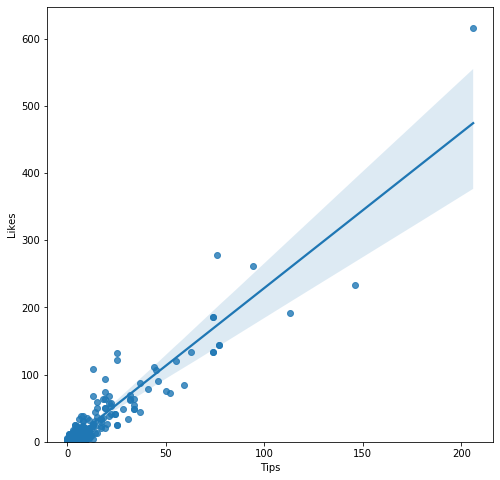

In [74]:
width = 8
height = 8
plt.figure(figsize=(width, height))
sns.regplot(x= "Tips", y="Likes", data= Rest_Cape_Town)
plt.ylim(0,)

#### Plotting Categories_class and these variables:Distance, Likes, Tips

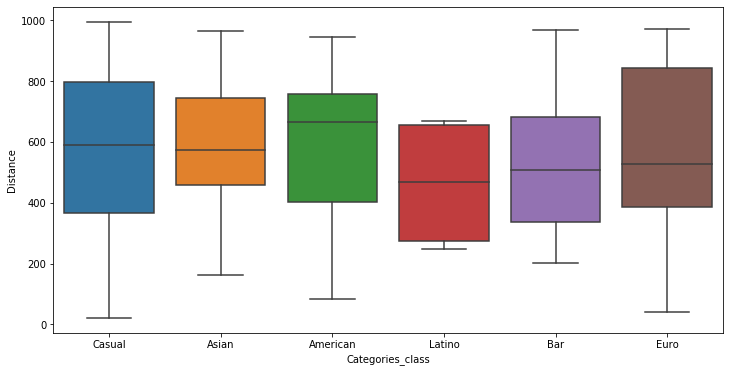

In [340]:
width = 12
height = 6
grid=True
plt.figure(figsize=(width, height))
sns.boxplot(x="Categories_class", y="Distance", data= Rest_Cape_Town)

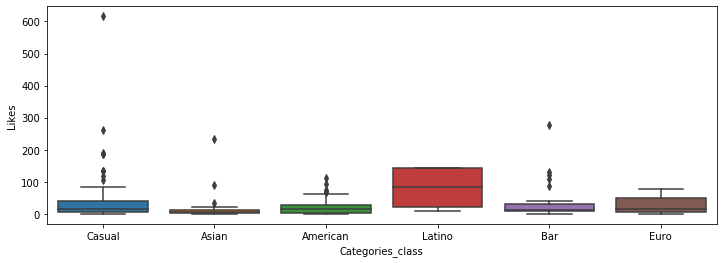

In [416]:
width = 12
height = 4
plt.figure(figsize=(width, height))
sns.boxplot(x="Categories_class", y="Likes", data=Rest_Cape_Town)

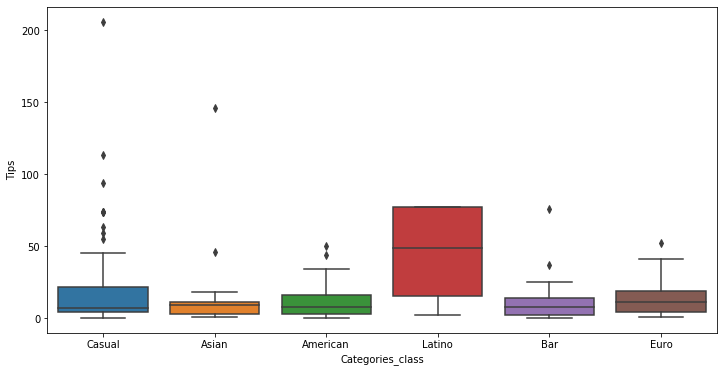

In [73]:
width = 12
height = 6
plt.figure(figsize=(width, height))
sns.boxplot(x="Categories_class", y="Tips", data=Rest_Cape_Town)

### 4.2 linear regression
A model was trained on a random subsample of 80% of the sample and then tested on the other 20%. To see if this is a reasonable model. the residual sum of squares score and variance score were both calculated (36805.64 and 0.01 respectively). Given the low variance score, this is probably not a valid/good way of modelling the data. Therefore, we move on to logistic regression.

In [81]:
# one hot encoding
Rest_Cape_Town_Hot = pd.get_dummies(Rest_Cape_Town[['Categories_class', 'Neighborhood']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Rest_Cape_Town_Hot['Name'] = Rest_Cape_Town['Name'] 
#Rest_Cape_Town_Hot['Likes'] = Rest_Cape_Town['Likes'] 
#Rest_Cape_Town_Hot['Tips'] = Rest_Cape_Town['Tips'] 
Rest_Cape_Town_Hot['Ranking_Likes'] = Rest_Cape_Town['Ranking_Likes'] 
Rest_Cape_Town_Hot['Ranking_Tips'] = Rest_Cape_Town['Ranking_Tips'] 
# move neighborhood column to the first column
fixed_columns = [Rest_Cape_Town_Hot.columns[-1]] + list(Rest_Cape_Town_Hot.columns[:-1])
Rest_Cape_Town_Hot = Rest_Cape_Town_Hot[fixed_columns]

Rest_Cape_Town_Hot.head(10)

,Ranking_Tips,American,Asian,Bar,Casual,Euro,Latino,Atlantic Seaboard,Bellville,Blue Downs,City Bowl,Constantia,Durbanville,Fish Hoek,Goodwood,Green Point,Hout Bay,Kuils River,Milnerton,Muizenberg,Parow,Simons Town,Wynberg,Name,Ranking_Likes
0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Vida E Caffè,1
1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Yuz Sushi,1
2,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Cattle Baron Grill House,1
3,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Yummy zone,1
4,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Copper Club Eatery,1
5,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Cantina Tequila,1
6,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Stones,1
7,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Buckleys Pub and Foosball Bar,1
8,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Vesuvio Pizzaria,1
9,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Kamili Coffee,2


In [82]:
Rest_Cape_Town_Hot.shape

(201, 25)

### 4.3.a Linear Regression Model Using The Ranking of Likes

In [103]:
# Multiple Linear Regression for Ranking of the Likes
from sklearn import linear_model
msk = np.random.rand(len(Rest_Cape_Town_Hot)) < 0.7
train = Rest_Cape_Town_Hot[msk]
test = Rest_Cape_Town_Hot[~msk]

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['American', 'Asian', 'Bar', 'Casual',
                         'Euro', 'Latino', 'Atlantic Seaboard',
                         'Bellville','Blue Downs','City Bowl',
                         'Constantia','Durbanville', 'Fish Hoek',
                         'Goodwood', 'Green Point','Hout Bay', 
                         'Kuils River', 'Milnerton', 'Muizenberg',
                         'Parow','Simons Town','Wynberg']])
y = np.asanyarray(train[['Ranking_Likes']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-0.06706242  0.02359477 -0.12271473 -0.05464934 -0.03629196  0.38455698
   0.17592718 -0.15873237 -0.1274333   0.33923736  0.42424389 -0.07222537
  -0.06827387 -0.15102807  0.13475181 -0.06761045 -0.06037088 -0.07575611
  -0.07278396 -0.07278396 -0.07030134 -0.07686055]]


In [104]:
# Multiple Linear Regression Prediction Ranking_Likes

y_hat= regr.predict(test[['American', 'Asian', 'Bar', 'Casual',
                         'Euro', 'Latino', 'Atlantic Seaboard',
                         'Bellville','Blue Downs','City Bowl',
                         'Constantia','Durbanville', 'Fish Hoek',
                         'Goodwood', 'Green Point','Hout Bay', 
                         'Kuils River', 'Milnerton', 'Muizenberg',
                         'Parow','Simons Town','Wynberg']])

x = np.asanyarray(test[['American', 'Asian', 'Bar', 'Casual',
                         'Euro', 'Latino', 'Atlantic Seaboard',
                         'Bellville','Blue Downs','City Bowl',
                         'Constantia','Durbanville', 'Fish Hoek',
                         'Goodwood', 'Green Point','Hout Bay', 
                         'Kuils River', 'Milnerton', 'Muizenberg',
                         'Parow','Simons Town','Wynberg']])

y = np.asanyarray(test[['Ranking_Likes']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 0.18
Variance score: -0.07


### 4.3.b Linear Regression Model Using The Ranking of Tips

In [113]:
# Multiple Linear Regression Ranking the Tips
from sklearn import linear_model
msk = np.random.rand(len(Rest_Cape_Town_Hot)) < 0.7
train = Rest_Cape_Town_Hot[msk]
test = Rest_Cape_Town_Hot[~msk]

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['American', 'Asian', 'Bar', 'Casual',
                         'Euro', 'Latino', 'Atlantic Seaboard',
                         'Bellville','Blue Downs','City Bowl',
                         'Constantia','Durbanville', 'Fish Hoek',
                         'Goodwood', 'Green Point','Hout Bay', 
                         'Kuils River', 'Milnerton', 'Muizenberg',
                         'Parow','Simons Town','Wynberg']])
y = np.asanyarray(train[['Ranking_Tips']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-3.15013679e+12 -3.15013679e+12 -3.15013679e+12 -3.15013679e+12
  -3.15013679e+12 -3.15013679e+12  4.08614267e+11  4.08614267e+11
  -3.41410454e+11  4.08614267e+11  4.08614267e+11  4.08614267e+11
   4.08614267e+11  4.08614267e+11  4.08614267e+11  4.08614267e+11
   4.08614267e+11  4.08614267e+11  4.08614267e+11  4.08614267e+11
   4.08614267e+11  4.08614267e+11]]


In [114]:
# Multiple Linear Regression Prediction Capabilities

y_hat= regr.predict(test[['American', 'Asian', 'Bar', 'Casual',
                         'Euro', 'Latino', 'Atlantic Seaboard',
                         'Bellville','Blue Downs','City Bowl',
                         'Constantia','Durbanville', 'Fish Hoek',
                         'Goodwood', 'Green Point','Hout Bay', 
                         'Kuils River', 'Milnerton', 'Muizenberg',
                         'Parow','Simons Town','Wynberg']])

x = np.asanyarray(test[['American', 'Asian', 'Bar', 'Casual',
                         'Euro', 'Latino', 'Atlantic Seaboard',
                         'Bellville','Blue Downs','City Bowl',
                         'Constantia','Durbanville', 'Fish Hoek',
                         'Goodwood', 'Green Point','Hout Bay', 
                         'Kuils River', 'Milnerton', 'Muizenberg',
                         'Parow','Simons Town','Wynberg']])

y = np.asanyarray(test[['Ranking_Tips']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 106676628723886416986112.00
Variance score: -711828488235361117405184.00


We can see form above that Linear Regresiion does not predict our data qiuet well.  
For **Ranking_Likes with Residual sum of squares: 0.18 and Variance score: -0.07 is not a good prediction of our model, same applies to Ranking_Tips**

### 4.4 Logistic Regression Results
A multi-nomial ordinal logisitc regression model will be used to train our data set, a sample of 70% of the dataset and then tested on the other 30% on the **Ranking_Likes** and **Ranking_Tips**. To see if this is approptaite, we will use jaccard similarity score and log-loss to calculate our trained and test data set and print the classification report.  

### Logistic Regression Ranking_Likes

In [87]:
# Multinomial Ordinal Logistic Regression Ranking_Likes

x_train = np.asanyarray(train[['American', 'Asian', 'Bar', 'Casual',
                         'Euro', 'Latino', 'Atlantic Seaboard',
                         'Bellville','Blue Downs','City Bowl',
                         'Constantia','Durbanville', 'Fish Hoek',
                         'Goodwood', 'Green Point','Hout Bay', 
                         'Kuils River', 'Milnerton', 'Muizenberg',
                         'Parow','Simons Town','Wynberg']])

y_train = np.asanyarray(train['Ranking_Likes'])

x_test = np.asanyarray(test[['American', 'Asian', 'Bar', 'Casual',
                         'Euro', 'Latino', 'Atlantic Seaboard',
                         'Bellville','Blue Downs','City Bowl',
                         'Constantia','Durbanville', 'Fish Hoek',
                         'Goodwood', 'Green Point','Hout Bay', 
                         'Kuils River', 'Milnerton', 'Muizenberg',
                         'Parow','Simons Town','Wynberg']])

y_test = np.asanyarray(test['Ranking_Likes'])


# LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train, y_train)
# LR

mul_ordinal = linear_model.LogisticRegression(multi_class='multinomial',
                                              solver='newton-cg',
                                              fit_intercept=True).fit(x_train,
                                                                      y_train)

mul_ordinal

coef = mul_ordinal.coef_[0]
print (coef)

[-0.03757545  0.64948181 -0.27454878 -0.20189139 -0.41175995  0.22495927
 -0.34471807  0.18456767  0.05132459 -1.29231628 -0.52263025  0.1626005
  0.24639415  0.07847819  0.14652948  0.2268053   0.06389682  0.15614933
  0.15638049  0.06430141  0.324675    0.29755178]


In [88]:
# Multinomial Ordinal Logistic Regression Prediction Capabilities
from sklearn.metrics import jaccard_similarity_score
yhat = mul_ordinal.predict(x_test)
yhat

yhat_prob = mul_ordinal.predict_proba(x_test)
yhat_prob


jaccard_similarity_score(y_test, yhat)

C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.8064516129032258

In [89]:
#from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.666510159523139

In [90]:
# Exploration of Coefficient Magnitudes of Full Dataset

x_all = np.asanyarray(Rest_Cape_Town_Hot[['American', 'Asian', 'Bar', 'Casual',
                         'Euro', 'Latino', 'Atlantic Seaboard',
                         'Bellville','Blue Downs','City Bowl',
                         'Constantia','Durbanville', 'Fish Hoek',
                         'Goodwood', 'Green Point','Hout Bay', 
                         'Kuils River', 'Milnerton', 'Muizenberg',
                         'Parow','Simons Town','Wynberg']])

y_all = np.asanyarray(Rest_Cape_Town_Hot['Ranking_Likes'])



LR = linear_model.LogisticRegression(multi_class='multinomial',
                                            solver='newton-cg',
                                            fit_intercept=True).fit(x_all,
                                                                    y_all)

LR

coef = LR.coef_[0]
print (coef)

[ 0.1857389   0.15535172  0.0493242   0.0659693  -0.02794058 -0.50777959
 -0.59992419  0.42162562  0.07933598 -1.08841088 -0.51825104  0.24388291
  0.31754267  0.11620536 -0.26623724  0.33673529  0.12973201 -0.31324301
  0.1498679   0.1498679   0.41152832  0.42974233]


In [91]:
from sklearn.metrics import classification_report
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.82      0.98      0.89        51
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         2

    accuracy                           0.81        62
   macro avg       0.27      0.33      0.30        62
weighted avg       0.67      0.81      0.73        62



C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 After Predicting the Ranking_Likes, this might not accurate prediction, **jaccard similarity score of 80.64% between the training set and test set results were obtained with a log loss of 0.66, very reasonable.  We can also see the classification report has 81% accuracy as printed above**.
To give the accuracy of this model in terms of likes, we can also run the model on the full dataset. The coefficients metrics show that opening a restaurant in Cape Town will depend on the type of restaurant and the neighborhood. All the metrics with negative values indicate that such restaurant type is not conducive for that particular neighborhood.


### Logistic Regression Ranking_Tips

In [92]:
# Multinomial Ordinal Logistic Regression Ranking_Likes

x_train = np.asanyarray(train[['American', 'Asian', 'Bar', 'Casual',
                         'Euro', 'Latino', 'Atlantic Seaboard',
                         'Bellville','Blue Downs','City Bowl',
                         'Constantia','Durbanville', 'Fish Hoek',
                         'Goodwood', 'Green Point','Hout Bay', 
                         'Kuils River', 'Milnerton', 'Muizenberg',
                         'Parow','Simons Town','Wynberg']])

y_train = np.asanyarray(train['Ranking_Tips'])

x_test = np.asanyarray(test[['American', 'Asian', 'Bar', 'Casual',
                         'Euro', 'Latino', 'Atlantic Seaboard',
                         'Bellville','Blue Downs','City Bowl',
                         'Constantia','Durbanville', 'Fish Hoek',
                         'Goodwood', 'Green Point','Hout Bay', 
                         'Kuils River', 'Milnerton', 'Muizenberg',
                         'Parow','Simons Town','Wynberg']])

y_test = np.asanyarray(test['Ranking_Tips'])


# LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train, y_train)
# LR

mul_ordinal = linear_model.LogisticRegression(multi_class='multinomial',
                                              solver='newton-cg',
                                              fit_intercept=True).fit(x_train,
                                                                      y_train)

mul_ordinal

coef = mul_ordinal.coef_[0]
print (coef)

[ 0.48117541  0.32594625  0.08604763 -0.79869667 -0.18496184  0.06948864
 -0.32249766  0.14003175  0.02098813 -0.94917532  0.04000315  0.08323376
  0.10748681  0.0219016  -0.14735168  0.33655508  0.00976748  0.04958524
  0.08460366  0.05843519  0.24684641  0.21957396]


In [93]:
# Multinomial Ordinal Logistic Regression Prediction Capabilities
from sklearn.metrics import jaccard_similarity_score
yhat = mul_ordinal.predict(x_test)
yhat

yhat_prob = mul_ordinal.predict_proba(x_test)
yhat_prob


jaccard_similarity_score(y_test, yhat)

C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.8870967741935484

In [94]:
#from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.4522855343427017

In [95]:
# Exploration of Coefficient Magnitudes of Full Dataset

x_all = np.asanyarray(Rest_Cape_Town_Hot[['American', 'Asian', 'Bar', 'Casual',
                         'Euro', 'Latino', 'Atlantic Seaboard',
                         'Bellville','Blue Downs','City Bowl',
                         'Constantia','Durbanville', 'Fish Hoek',
                         'Goodwood', 'Green Point','Hout Bay', 
                         'Kuils River', 'Milnerton', 'Muizenberg',
                         'Parow','Simons Town','Wynberg']])

y_all = np.asanyarray(Rest_Cape_Town_Hot['Ranking_Tips'])



LR = linear_model.LogisticRegression(multi_class='multinomial',
                                            solver='newton-cg',
                                            fit_intercept=True).fit(x_all,
                                                                    y_all)

LR

coef = LR.coef_[0]
print (coef)

[ 0.43468999  0.06614641  0.38872785 -0.32853154  0.21008372 -0.80567371
 -0.68221741  0.27056868  0.03455057 -0.81309479  0.04458593  0.14559272
  0.16990789  0.04348147 -0.49202272  0.41099357  0.06908656  0.0848735
  0.07599734  0.07599734  0.27877401  0.28291863]


In [96]:
from sklearn.metrics import classification_report
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.89      1.00      0.94        55
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         1

    accuracy                           0.89        62
   macro avg       0.30      0.33      0.31        62
weighted avg       0.79      0.89      0.83        62



C:\Users\TOSHIBA-PC\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In the same way, after predicting the **Ranking_Tips**, we can compare our predictions, **jaccard similarity score of 88.70% between the training set and test set results were obtained with a log loss of 0.45. We can also see the classification report has 89% accuracy as printed above**.
To give the accuracy of this model, we can also run the model on the full dataset. The coefficients metrics show that opening a restaurant in Cape Town and receive a positive tips equally will depend on the type of restaurant and the neighborhood. All the metrics with negative values indicate that such restaurant types in terms of Tips will do not do in these neighborhoods.


#### 4.4 Center of all clusters & Midpoint of all venues
#### We will be collating the location of centroid of all clusters and midpoint of all venues to get more accurate location

In [97]:
Final_Location = Cape_neighbor_merged.groupby(['Clusters']).mean()

lati = sum(Final_Location.Latitude)/len(Final_Location.Latitude)
longi = sum(Final_Location.Longitude)/len(Final_Location.Longitude)

#Taking midpoint of top ten closest hotel
venues_lan = sum(Rated_Tips.Latitude)/len(Rated_Tips.Latitude)
venues_lng = sum(Rated_Tips.Longitude)/len(Rated_Tips.Longitude)

final_latitude = (lati+venues_lan)/2
final_longitude = (longi+venues_lng)/2

print("Final location (Navy Blue Dot in our below given map) of our brand new hotel:{},{}".format(final_latitude,final_longitude))

Final location (Navy Blue Dot in our below given map) of our brand new hotel:-33.98002647334419,18.462481257441652


In [100]:
Final_Location

,Distance,Latitude,Longitude,Likes,Tips
Clusters,,,,,
0,419.428571,-34.166413,18.445208,6.285714,3.142857
1,747.000000,-33.912619,18.545420,2.000000,2.000000
2,659.663158,-33.923894,18.448728,41.084211,10.684211
3,751.333333,-34.035247,18.502207,18.666667,3.833333
4,799.000000,-34.027252,18.424124,108.500000,24.000000


In [99]:
Final_Location.corr()

,Distance,Latitude,Longitude,Likes,Tips
Distance,1.000000,0.667529,0.294382,0.481209,0.436803
Latitude,0.667529,1.000000,0.461684,0.052988,0.065418
Longitude,0.294382,0.461684,1.000000,-0.670637,-0.696032
Likes,0.481209,0.052988,-0.670637,1.000000,0.995767
Tips,0.436803,0.065418,-0.696032,0.995767,1.000000


#### My suitable location in navy blue in the mist all General Clustered Venues

In [101]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start= 10)
tooltip = 'Click me!'
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='black',
    popup='Central Location in Cape Town',
    fill = True,
    fill_color = 'black',
    fill_opacity = 0.8,
    tooltip = tooltip).add_to(map_clusters)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
tooltip = 'Click me!'
folium.CircleMarker(
    [final_latitude, final_longitude],
    radius=10,
    color='navy',
    popup='My suitsble location for the hotel and Restaurant',
    fill = True,
    fill_color = 'navy',
    fill_opacity = 1,
    tooltip = tooltip).add_to(map_clusters)

markers_colors = []
for lat, lon, poi, cluster in zip(Cape_neighbor_merged['Latitude'], Cape_neighbor_merged['Longitude'], Cape_neighbor_merged['Neighborhood'], Cape_neighbor_merged['Clusters']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    tooltip = 'Click me!'
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity= 1,
    tooltip = tooltip).add_to(map_clusters)
    
map_clusters

In [102]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start= 10)
tooltip = 'Click me!'
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Central Location in Cape Town',
    fill = True,
    fill_color = 'red',
    fill_opacity = 1,
    tooltip = tooltip).add_to(map_clusters)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
tooltip = 'Click me!'
folium.CircleMarker(
    [final_latitude, final_longitude],
    radius=10,
    color='navy',
    popup='My suitsble location for the hotel and Restaurant',
    fill = True,
    fill_color = 'navy',
    fill_opacity = 1,
    tooltip = tooltip).add_to(map_clusters)


for lat, lng,Name, Neighborhood in zip(Hotels_Cape['Latitude'], Hotels_Cape['Longitude'], Hotels_Cape['Name'], Hotels_Cape['Neighborhood']):
            label = '{}, {}'.format(Name, Neighborhood)
            label = folium.Popup(label, parse_html=True)
            tooltip = 'Click me!'
            folium.Marker(
                [lat, lng],
                radius=5,
                popup=label,
                color='maroon',
                fill=True,
                fill_color='orange',
                fill_opacity=0.7,
                parse_html = False,
                tooltip = tooltip).add_to(map_clusters)
            
#markers_colors = []
for lat, lon, poi, cluster in zip(Cape_neighbor_merged['Latitude'], Cape_neighbor_merged['Longitude'], Cape_neighbor_merged['Neighborhood'], Cape_neighbor_merged['Clusters']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    tooltip = 'Click me!'
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color= 'maroon',
        fill=True,
        fill_color= 'maroon',
        fill_opacity= 1,
    tooltip = tooltip).add_to(map_clusters)            
            
            
for lat, lng,Name, Neighborhood in zip(Rated_Tips['Latitude'], Rated_Tips['Longitude'], Rated_Tips['Name'], Rated_Tips['Neighborhood']):
            label = '{}, {}'.format(Name, Neighborhood)
            label = folium.Popup(label, parse_html=True)
            tooltip = 'Click me!'
            folium.CircleMarker(
                [lat, lng],
                radius=8,
                popup=label,
                color='gold',
                fill=True,
                fill_color='black',
                fill_opacity= 1,
                parse_html = False,
                tooltip = tooltip).add_to(map_clusters)  

for lat, lng,Name, Neighborhood in zip(Rest_Cape_Town['Latitude'], Rest_Cape_Town['Longitude'], Rest_Cape_Town['Name'], Rest_Cape_Town['Neighborhood']):
            label = '{}, {}'.format(Name, Neighborhood)
            label = folium.Popup(label, parse_html=True)
            tooltip = 'Click me!'
            folium.CircleMarker(
                [lat, lng],
                radius=5,
                popup=label,
                color='maroon',
                fill=True,
                fill_color='maroon',
                fill_opacity= 1,
                parse_html = False,
                tooltip=tooltip).add_to(map_clusters)
map_clusters

#### My hotel location
Final location (Navy Blue Dot in the above given map) of the new location:-33.98002647334419,18.462481257441652.
Located at exactly at Cavendis Square, on Cavendis Street, opposite Proyea Road and adjacent to Main Road, surrounded by lot of surburbs such as Newlands, Claremont, Bishopscourt, Rondebosch, Crawford and so on. Located in between Paradise Drive (M3) and a railway makes this location highly advantageous for easy movement.
It is very interesting that there are no hotels and only 8 restaurants in this Neighborhood.
Wynberg is close to University of Cape Town at Rosebank and located at the center wher one can easily trave north to Cape Town Central, Bellville, Durbanville,Brackenfell, Parow, Milnerton, Goodwood and Kuilsriver or west to Hout Bay and south to Muizenberg, Fish Heok and Simon's Town.  

#### Spot my hotel against others 
**Navy Blue - My hotel and restaurant location, Wynberg.**
<br>
**Red -  Central location of Cape Town.**
<br>
**Orange and Black  - General Venues.**
<br>
**Blue Markers are - Other hotels.**
<br>
**Maroon - Other Restaurants**

### 5 Discussion
The aim of this project is to identify a suitable location to open a hotel and restaurant. To choose a venue or neighborhood for such an important business operation is difficult. Looking for a neighborhood at a good central location such as this to connect and self-advertise the business to the general public is a step in the right direction. We can see that there are about three or four Clusters all around this location which undeniably is a great spot. You have Train stations and Bus stops leading to most common venues. My predicted location is at the center of most important venues. KMeans have figured out the most common place equidistance to all these venues. This proves the accurate spotting of our predicted algorithm. Despite the findings, there were some lack in data. Tips and ratings were missing for most of the venues.

<br>
Secondly, to identify which restaurant type will be more profitable, logistic regression presents a better fit for the data. Using logistic regression we were able to obtain a Jaccard Similarity Score of 80.64% between the training set and test set results with a log loss of 0.66, 81% accuracy for Ranking of Likes and for Ranking of Tips, we can compare our predictions, jaccard similarity score of 88.70% between the training set and test set results with a log loss of 0.45, 89% accuracy, which although not perfect, but reasonable. We are assuming that likes and tips are a good way of showing how well a restaurant is doing in terms of quality of service and brand image and therefore using these two variables to predict how well the new restaurant will perform in business-wise, is good idea.
<br>

Additionally, not only are we attempting to predict the general business performance but also pull insights to inform on business strategy. In this case strategy insight can be gleamed from the
 Coefficient values from running the logistic regression on the full dataset. As such, we can see that opening a   restaurant in Cape Town, will depend on the type of restaurant and the neighborhood selected as some types of restaurants and neighborhoods scored negative Coefficient Magnitudes values. Our location is within Wynberg which is last on the Neighborhood list, scored positive values for 
both likes. 
And tips. For example,

Exploration of Coefficient Magnitudes of Full Dataset for Likes

Cuisines 
American [-0.03757545], Asian [0.64948181], Bar [-0.27454878],
 Casual [-0.20189139] Euro [-0.41175995], Latino [0.22495927]
Neighborhoods
Atlantic Seaboard [-0.34471807], Bellville [0.18456767], Blue Downs [0.05132459],
City Bowl [-1.29231628], Constantia [-0.52263025], Durbanville [0.1626005], 
Fish Hoek [0.24639415], Goodwood [0.07847819], Green Point [0.14652948], 
Hout Bay [0.2268053], Kuils River [0.06389682], Milnerton [0.15614933],
Muizenberg [0.15638049], Parow [0.06430141], Simon’s Town [0.324675],
Wynberg [0.29755178].

<br>
We can see from above that serving cuisine that is American, Euro casual, Bar in nature, are associated negatively with "Likes", but Asian or Latino is preferred instead.  Also neighborhoods like Atlantic Seaboard, City Bowl and Constantia have negative score. This suggests that the business opportunity should be opening a restaurant in any of the positive rated neighborhoods but due proximity to most important venues as selected by Kmeans algorithm, Wynberg is that perfect location. Whether or not these assumptions hold up in a real-life scenario is up for discussion, but this project does contain limitations in scope due to the amount of data that can be fetched from the Foursquare API.


### 6 Conclusion
In conclusion, after analyzing the neighborhoods in Cape Town, using Kmeans, it is convincing that Wynberg is a suitable location to open a hotel and restaurant. Furthermore, with “likes” and “tips” received from 140 restaurants, we can conclude that the best approach to maximizing business performance is to open a restaurant that is either Asian, Latino, or casual. 
Future Expectations:
As data is increasingly becoming bigger and bigger, I would use a larger data set coupled with different clustering algorithm to predict a similar central location. Also, Research based on hotel reviews and restaurant menus could be used for future purpose.
My Experience:
It has been a wonderful journey for me in IBM capstone and other courses. It can help to kick start my career as a data scientist. Thanks to Coursera for keeping such Skillful instructors. God Bless You!


Than you!